In [1]:
!pip install transformers datasets evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 15.3 MB/s 
     |████████████████████████████████| 452 kB 75.3 MB/s 
     |████████████████████████████████| 81 kB 12.3 MB/s 
     |████████████████████████████████| 7.6 MB 54.6 MB/s 
     |████████████████████████████████| 182 kB 57.4 MB/s 
     |████████████████████████████████| 132 kB 16.4 MB/s 
     |████████████████████████████████| 212 kB 64.6 MB/s 
     |████████████████████████████████| 127 kB 27.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
!pip install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [3]:
from datasets import load_dataset, Audio, Dataset

In [4]:
import os

from fastprogress import progress_bar as pb

In [5]:
import gdown

In [6]:
gdown.download('https://drive.google.com/open?id=19oAw8wWn3Y7z6CKChRdAyGOB9yupL_Xt', 'jvs.zip', quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=19oAw8wWn3Y7z6CKChRdAyGOB9yupL_Xt
To: /content/jvs.zip
100%|██████████| 3.54G/3.54G [00:32<00:00, 109MB/s]


'jvs.zip'

In [7]:
!unzip jvs.zip -d jvs > /dev/null

In [8]:
from glob import glob
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [9]:
wavs = glob('/content/jvs/jvs_ver1/**/*.wav', recursive=True)

In [10]:
wavs

['/content/jvs/jvs_ver1/jvs092/falset10/wav24kHz16bit/VOICEACTRESS100_004.wav',
 '/content/jvs/jvs_ver1/jvs092/falset10/wav24kHz16bit/BASIC5000_1148.wav',
 '/content/jvs/jvs_ver1/jvs092/falset10/wav24kHz16bit/VOICEACTRESS100_002.wav',
 '/content/jvs/jvs_ver1/jvs092/falset10/wav24kHz16bit/BASIC5000_1272.wav',
 '/content/jvs/jvs_ver1/jvs092/falset10/wav24kHz16bit/TRAVEL1000_0298.wav',
 '/content/jvs/jvs_ver1/jvs092/falset10/wav24kHz16bit/VOICEACTRESS100_003.wav',
 '/content/jvs/jvs_ver1/jvs092/falset10/wav24kHz16bit/VOICEACTRESS100_001.wav',
 '/content/jvs/jvs_ver1/jvs092/falset10/wav24kHz16bit/BASIC5000_0713.wav',
 '/content/jvs/jvs_ver1/jvs092/falset10/wav24kHz16bit/BASIC5000_0012.wav',
 '/content/jvs/jvs_ver1/jvs092/falset10/wav24kHz16bit/VOICEACTRESS100_005.wav',
 '/content/jvs/jvs_ver1/jvs092/nonpara30/wav24kHz16bit/BASIC5000_2517.wav',
 '/content/jvs/jvs_ver1/jvs092/nonpara30/wav24kHz16bit/TRAVEL1000_0940.wav',
 '/content/jvs/jvs_ver1/jvs092/nonpara30/wav24kHz16bit/BASIC5000_2388.w

In [11]:
# le = LabelEncoder()

In [12]:
df_wavs = pd.DataFrame({'filepath': wavs})
df_wavs['label_name'] = df_wavs['filepath'].map(lambda x: x.split('/')[-4])
df_wavs['label'] = df_wavs['label_name'].map(lambda x: int(x[-3:])-1)#le.fit_transform(df_wavs['label_name'])

In [13]:
# df_wavs = df_wavs.sample(3000).reset_index(drop=True)

In [14]:
df_wavs = df_wavs[df_wavs['filepath'].map(lambda x: 'parallel100' in x)].reset_index(drop=True)

In [15]:
df_wavs

,filepath,label_name,label
0,/content/jvs/jvs_ver1/jvs092/parallel100/wav24...,jvs092,91
1,/content/jvs/jvs_ver1/jvs092/parallel100/wav24...,jvs092,91
2,/content/jvs/jvs_ver1/jvs092/parallel100/wav24...,jvs092,91
3,/content/jvs/jvs_ver1/jvs092/parallel100/wav24...,jvs092,91
4,/content/jvs/jvs_ver1/jvs092/parallel100/wav24...,jvs092,91
...,...,...,...
9992,/content/jvs/jvs_ver1/jvs070/parallel100/wav24...,jvs070,69
9993,/content/jvs/jvs_ver1/jvs070/parallel100/wav24...,jvs070,69
9994,/content/jvs/jvs_ver1/jvs070/parallel100/wav24...,jvs070,69
9995,/content/jvs/jvs_ver1/jvs070/parallel100/wav24...,jvs070,69


In [16]:
df_wavs = df_wavs.sample(3000)

In [17]:
df_wavs['label'].value_counts()

84    40
44    39
96    38
19    38
47    37
      ..
56    23
54    23
1     23
68    21
88    18
Name: label, Length: 100, dtype: int64

In [18]:
df_wavs['train'] = df_wavs['label'] <= 80

In [19]:
df_wavs['train'].value_counts()

True     2435
False     565
Name: train, dtype: int64

In [20]:
# le.classes_

In [21]:
label2id, id2label = dict(), dict()

In [22]:
label2id = {lbl: str(int(lbl[-3:])-1) for lbl in sorted(df_wavs['label_name'].unique())}

In [23]:
id2label = {str(int(lbl[-3:])-1): lbl for lbl in sorted(df_wavs['label_name'].unique())}

In [24]:
Dataset.from_dict({
    "audio": df_wavs['filepath'],
    'label': df_wavs['label'].tolist()
}).cast_column("audio", Audio())

Dataset({
    features: ['audio', 'label'],
    num_rows: 3000
})

In [25]:
audio_dataset = {
    'train': Dataset.from_dict({
        "audio": df_wavs[df_wavs['train']]['filepath'],
        'label': df_wavs[df_wavs['train']]['label'].tolist()
    }).cast_column("audio", Audio()),
    'test': Dataset.from_dict({
        "audio": df_wavs[~df_wavs['train']]['filepath'],
        'label': df_wavs[~df_wavs['train']]['label'].tolist()
    }).cast_column("audio", Audio()),
}

In [27]:
audio_dataset

{'train': Dataset({
     features: ['audio', 'label'],
     num_rows: 2435
 }), 'test': Dataset({
     features: ['audio', 'label'],
     num_rows: 565
 })}

In [28]:
audio_dataset["train"][0]

{'audio': {'path': '/content/jvs/jvs_ver1/jvs017/parallel100/wav24kHz16bit/VOICEACTRESS100_032.wav',
  'array': array([3.0517578e-05, 6.1035156e-05, 1.2207031e-04, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00], dtype=float32),
  'sampling_rate': 24000},
 'label': 16}

In [29]:
import matplotlib.pyplot as plt

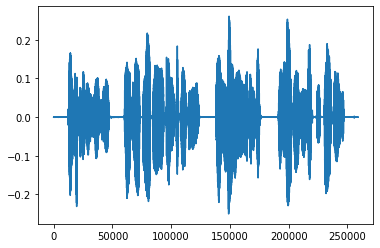

In [30]:
plt.plot(audio_dataset["train"][0]['audio']['array'])

In [31]:
import IPython.display

In [32]:
IPython.display.Audio(audio_dataset["train"][0]['audio']['array'], rate=audio_dataset["train"][0]['audio']['sampling_rate'])

In [33]:
labels = sorted(df_wavs['label_name'].unique())

In [34]:
labels

['jvs001',
 'jvs002',
 'jvs003',
 'jvs004',
 'jvs005',
 'jvs006',
 'jvs007',
 'jvs008',
 'jvs009',
 'jvs010',
 'jvs011',
 'jvs012',
 'jvs013',
 'jvs014',
 'jvs015',
 'jvs016',
 'jvs017',
 'jvs018',
 'jvs019',
 'jvs020',
 'jvs021',
 'jvs022',
 'jvs023',
 'jvs024',
 'jvs025',
 'jvs026',
 'jvs027',
 'jvs028',
 'jvs029',
 'jvs030',
 'jvs031',
 'jvs032',
 'jvs033',
 'jvs034',
 'jvs035',
 'jvs036',
 'jvs037',
 'jvs038',
 'jvs039',
 'jvs040',
 'jvs041',
 'jvs042',
 'jvs043',
 'jvs044',
 'jvs045',
 'jvs046',
 'jvs047',
 'jvs048',
 'jvs049',
 'jvs050',
 'jvs051',
 'jvs052',
 'jvs053',
 'jvs054',
 'jvs055',
 'jvs056',
 'jvs057',
 'jvs058',
 'jvs059',
 'jvs060',
 'jvs061',
 'jvs062',
 'jvs063',
 'jvs064',
 'jvs065',
 'jvs066',
 'jvs067',
 'jvs068',
 'jvs069',
 'jvs070',
 'jvs071',
 'jvs072',
 'jvs073',
 'jvs074',
 'jvs075',
 'jvs076',
 'jvs077',
 'jvs078',
 'jvs079',
 'jvs080',
 'jvs081',
 'jvs082',
 'jvs083',
 'jvs084',
 'jvs085',
 'jvs086',
 'jvs087',
 'jvs088',
 'jvs089',
 'jvs090',
 'jvs091',

In [35]:
from transformers import AutoFeatureExtractor

In [36]:
feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base")

Downloading:   0%|          | 0.00/159 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

/usr/local/lib/python3.8/dist-packages/transformers/configuration_utils.py:369: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [37]:
audio_dataset['train'] = audio_dataset['train'].cast_column("audio", Audio(sampling_rate=16_000))
audio_dataset['test'] = audio_dataset['test'].cast_column("audio", Audio(sampling_rate=16_000))

In [38]:
audio_dataset["train"][0]

{'audio': {'path': '/content/jvs/jvs_ver1/jvs017/parallel100/wav24kHz16bit/VOICEACTRESS100_032.wav',
  'array': array([ 1.9385738e-05,  9.7726661e-05,  2.8488997e-04, ...,
          2.5817722e-05, -2.5022271e-06, -2.8876332e-07], dtype=float32),
  'sampling_rate': 16000},
 'label': 16}

In [80]:
def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    # inputs = feature_extractor(
    #     audio_arrays, sampling_rate=feature_extractor.sampling_rate, max_length=16000*5, truncation=True
    # ) # for wav2vec2 classification
    inputs = feature_extractor(
        audio_arrays, sampling_rate=feature_extractor.sampling_rate, max_length=16000*5, padding='max_length', truncation=True
    )
    return inputs

In [82]:
encoded_audio_dataset = {
    'train': audio_dataset['train'].map(preprocess_function, remove_columns="audio", batched=True),
    'test': audio_dataset['test'].map(preprocess_function, remove_columns="audio", batched=True),
}

  0%|          | 0/3 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [42]:
encoded_audio_dataset

{'train': Dataset({
     features: ['label', 'input_values'],
     num_rows: 2435
 }), 'test': Dataset({
     features: ['label', 'input_values'],
     num_rows: 565
 })}

In [43]:
len(encoded_audio_dataset["train"][0])

2

In [44]:
encoded_audio_dataset["train"][0].keys()

dict_keys(['label', 'input_values'])

In [45]:
len(encoded_audio_dataset["train"][0]['input_values'])

80000

In [46]:
import evaluate

In [ ]:
accuracy = evaluate.load("accuracy")

In [47]:
import numpy as np


def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=eval_pred.label_ids)

In [ ]:
# def compute_metrics(p):
#     predictions, labels = p
#     predictions = np.argmax(predictions, axis=1)
#     acc = accuracy_score(labels, predictions)
#     f1 = f1_score(labels, predictions, average="weighted")
#     recall = recall_score(labels, predictions, average="weighted")
#     precision = precision_score(labels, predictions, average="weighted")

#     return {"accuracy": acc, "f1-score": f1, "recall-score": recall, "precision-score": precision}

In [48]:
from transformers import AutoModelForAudioClassification, TrainingArguments, Trainer

In [49]:
num_labels = len(labels)

In [46]:
num_labels

100

In [47]:
len(id2label)

100

In [ ]:
# num_labels = len(id2label)
model = AutoModelForAudioClassification.from_pretrained(
    "facebook/wav2vec2-base", num_labels=num_labels, label2id=label2id, id2label=id2label
)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--facebook--wav2vec2-base/snapshots/0b5b8e868dd84f03fd87d01f9c4ff0f080fecfe8/config.json
/usr/local/lib/python3.8/dist-packages/transformers/configuration_utils.py:369: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Model config Wav2Vec2Config {
  "_name_or_path": "facebook/wav2vec2-base",
  "activation_dropout": 0.0,
  "adapter_kernel_size": 3,
  "adapter_stride": 2,
  "add_adapter": false,
  "apply_spec_augment": true,
  "architectures": [
    "Wav2Vec2ForPreTraining"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 1,
  "classifier_proj_size": 256,
  "codevector_dim": 256,
  "contrastive_logits_temperature": 0.1,
  "conv_bias": false,
  "conv_d

In [ ]:
model

Wav2Vec2ForSequenceClassification(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1): Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (2): Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (3): Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (4): Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), strid

In [ ]:
training_args = TrainingArguments(
    output_dir="model1",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=32,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=32,
    num_train_epochs=20,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=False,
)


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
from copy import deepcopy
from transformers import TrainerCallback

class CustomCallback(TrainerCallback):
    
    def __init__(self, trainer) -> None:
        super().__init__()
        self._trainer = trainer
    
    def on_epoch_end(self, args, state, control, **kwargs):
        if control.should_evaluate:
            control_copy = deepcopy(control)
            self._trainer.evaluate(eval_dataset=self._trainer.train_dataset, metric_key_prefix="train")
            return control_copy

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_audio_dataset["train"],
    eval_dataset=encoded_audio_dataset["test"],
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.add_callback(CustomCallback(trainer)) 

In [ ]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 2449
  Num Epochs = 20
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 128
  Gradient Accumulation steps = 4
  Total optimization steps = 380
  Number of trainable parameters = 94594276


Epoch,Training Loss,Validation Loss,Accuracy
0,4.601900,4.581206,0.022866
0,4.601900,4.663536,0.000000
1,4.566900,4.478329,0.100449
1,4.566900,4.774630,0.000000
2,4.429100,4.261205,0.309106
2,4.429100,4.787950,0.000000
3,4.202400,4.047798,0.534504
3,4.202400,4.772223,0.000000
4,4.001600,3.840140,0.681094
4,4.001600,4.758916,0.000000


***** Running Evaluation *****
  Num examples = 2449
  Batch size = 32
***** Running Evaluation *****
  Num examples = 551
  Batch size = 32
Saving model checkpoint to model1/checkpoint-19
Configuration saved in model1/checkpoint-19/config.json
Model weights saved in model1/checkpoint-19/pytorch_model.bin
Feature extractor saved in model1/checkpoint-19/preprocessor_config.json
***** Running Evaluation *****
  Num examples = 2449
  Batch size = 32
***** Running Evaluation *****
  Num examples = 551
  Batch size = 32
Saving model checkpoint to model1/checkpoint-38
Configuration saved in model1/checkpoint-38/config.json
Model weights saved in model1/checkpoint-38/pytorch_model.bin
Feature extractor saved in model1/checkpoint-38/preprocessor_config.json
***** Running Evaluation *****
  Num examples = 2449
  Batch size = 32
***** Running Evaluation *****
  Num examples = 551
  Batch size = 32
Saving model checkpoint to model1/checkpoint-57
Configuration saved in model1/checkpoint-57/config.

KeyboardInterrupt: ignored

In [ ]:
trained_extractor = AutoFeatureExtractor.from_pretrained("/content/model1/checkpoint-228")

loading configuration file /content/model1/checkpoint-228/preprocessor_config.json
Feature extractor Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0.0,
  "return_attention_mask": false,
  "sampling_rate": 16000
}



In [ ]:
trained_extractor

Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0.0,
  "return_attention_mask": false,
  "sampling_rate": 16000
}

In [ ]:
trained_extractor(
    [audio_dataset["train"][0]['audio']['array']], sampling_rate=trained_extractor.sampling_rate, max_length=16000, truncation=True
)

{'input_values': [array([ 6.1399513e-04,  1.4729109e-03,  6.7273839e-05, ...,
       -2.9617398e+00, -1.9661157e+00, -8.7348092e-01], dtype=float32)]}

In [ ]:
type(trained_extractor)

transformers.models.wav2vec2.feature_extraction_wav2vec2.Wav2Vec2FeatureExtractor

In [ ]:
trained_model = AutoModelForAudioClassification.from_pretrained(
    "/content/model1/checkpoint-228", num_labels=num_labels, label2id=label2id, id2label=id2label
)

loading configuration file /content/model1/checkpoint-228/config.json
Model config Wav2Vec2Config {
  "_name_or_path": "/content/model1/checkpoint-228",
  "activation_dropout": 0.0,
  "adapter_kernel_size": 3,
  "adapter_stride": 2,
  "add_adapter": false,
  "apply_spec_augment": true,
  "architectures": [
    "Wav2Vec2ForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 1,
  "classifier_proj_size": 256,
  "codevector_dim": 256,
  "contrastive_logits_temperature": 0.1,
  "conv_bias": false,
  "conv_dim": [
    512,
    512,
    512,
    512,
    512,
    512,
    512
  ],
  "conv_kernel": [
    10,
    3,
    3,
    3,
    3,
    2,
    2
  ],
  "conv_stride": [
    5,
    2,
    2,
    2,
    2,
    2,
    2
  ],
  "ctc_loss_reduction": "sum",
  "ctc_zero_infinity": false,
  "diversity_loss_weight": 0.1,
  "do_stable_layer_norm": false,
  "eos_token_id": 2,
  "feat_extract_activation": "gelu",
  "feat_extract_norm": "group",
  "feat_proj_dropout": 0.1,
  "feat

In [ ]:
from transformers import pipeline

In [ ]:
classifier = pipeline("audio-classification", model="/content/model1/checkpoint-228")

loading configuration file /content/model1/checkpoint-228/config.json
Model config Wav2Vec2Config {
  "_name_or_path": "/content/model1/checkpoint-228",
  "activation_dropout": 0.0,
  "adapter_kernel_size": 3,
  "adapter_stride": 2,
  "add_adapter": false,
  "apply_spec_augment": true,
  "architectures": [
    "Wav2Vec2ForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 1,
  "classifier_proj_size": 256,
  "codevector_dim": 256,
  "contrastive_logits_temperature": 0.1,
  "conv_bias": false,
  "conv_dim": [
    512,
    512,
    512,
    512,
    512,
    512,
    512
  ],
  "conv_kernel": [
    10,
    3,
    3,
    3,
    3,
    2,
    2
  ],
  "conv_stride": [
    5,
    2,
    2,
    2,
    2,
    2,
    2
  ],
  "ctc_loss_reduction": "sum",
  "ctc_zero_infinity": false,
  "diversity_loss_weight": 0.1,
  "do_stable_layer_norm": false,
  "eos_token_id": 2,
  "feat_extract_activation": "gelu",
  "feat_extract_norm": "group",
  "feat_proj_dropout": 0.1,
  "feat

In [ ]:
df_wavs

,filepath,label_name,label,train
8000,/content/jvs/jvs_ver1/jvs100/parallel100/wav24...,jvs100,99,False
7711,/content/jvs/jvs_ver1/jvs024/parallel100/wav24...,jvs024,23,True
2556,/content/jvs/jvs_ver1/jvs066/parallel100/wav24...,jvs066,65,True
3353,/content/jvs/jvs_ver1/jvs011/parallel100/wav24...,jvs011,10,True
426,/content/jvs/jvs_ver1/jvs071/parallel100/wav24...,jvs071,70,True
...,...,...,...,...
5809,/content/jvs/jvs_ver1/jvs003/parallel100/wav24...,jvs003,2,True
5373,/content/jvs/jvs_ver1/jvs095/parallel100/wav24...,jvs095,94,False
547,/content/jvs/jvs_ver1/jvs015/parallel100/wav24...,jvs015,14,True
928,/content/jvs/jvs_ver1/jvs026/parallel100/wav24...,jvs026,25,True


In [ ]:
pred_labels = []
true_labels = []

for wav, label in zip(pb(df_wavs['filepath']), df_wavs['label_name']):
    preds = classifier(wav)
    pred_labels.append(preds[0]['label'])
    true_labels.append(label)

KeyboardInterrupt: ignored

In [ ]:
df_preds = pd.DataFrame({
    'true': true_labels,
    'pred': pred_labels,
})

In [ ]:
df_preds['ok'] = df_preds['true'] == df_preds['pred']

In [ ]:
df_preds.groupby(['true'])['ok'].mean().tolist()

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.42857142857142855,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.75,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

## 学習に用いた話者81人とそれ以外の話者(テストデータ19人=1クラス)で82分類

### 1.Wav2Vec2 pretrained classifier embedding feature

In [60]:
import torch

In [ ]:
trained_model.classifier = torch.nn.Identity()

In [ ]:
audio_dataset['train'][0]

{'audio': {'path': '/content/jvs/jvs_ver1/jvs024/parallel100/wav24kHz16bit/VOICEACTRESS100_088.wav',
  'array': array([-5.0820327e-06,  1.7895731e-05, -1.9707952e-05, ...,
          8.9736612e-05,  1.4208477e-04,  5.1870255e-05], dtype=float32),
  'sampling_rate': 16000},
 'label': 23}

In [ ]:
labels = []
feats = []

for d in pb(audio_dataset['train']):
    inputs = trained_extractor(d["audio"]["array"], sampling_rate=trained_extractor.sampling_rate, return_tensors="pt")
    with torch.no_grad():
        feats.append(trained_model(**inputs).logits.squeeze().cpu().detach().numpy())
    labels.append(d['label'])

In [ ]:
labels_test = []
feats_test = []

for d in pb(audio_dataset['test']):
    inputs = trained_extractor(d["audio"]["array"], sampling_rate=trained_extractor.sampling_rate, return_tensors="pt")
    with torch.no_grad():
        feats_test.append(trained_model(**inputs).logits.squeeze().cpu().detach().numpy())
    labels_test.append(d['label'])

In [ ]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.4 MB/s 
     |████████████████████████████████| 1.1 MB 52.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=b64b9dddcf7690b638b4fc281e1ff4f6ec6efa469f25b2c30779b90577340db8
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=a9fce94bbab73543136eb2ff31da99525ecb44f00381695920381c3ce5a22a72
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [ ]:
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
np.stack(feats_test).shape

(551, 256)

In [ ]:
feats_reduced_train = UMAP(n_components=2).fit_transform(np.stack(feats))

In [ ]:
feats_reduced_test = UMAP(n_components=2).fit_transform(np.stack(feats_test))

In [ ]:
feats_reduced_train.shape

(2449, 2)

In [ ]:
df_feats_reduced_train = pd.DataFrame({
    'c1': feats_reduced_train[:, 0],
    'c2': feats_reduced_train[:, 1],
    'label': map(str, labels),
})

In [ ]:
df_feats_reduced_test = pd.DataFrame({
    'c1': feats_reduced_test[:, 0],
    'c2': feats_reduced_test[:, 1],
    'label': map(str, labels_test),
})

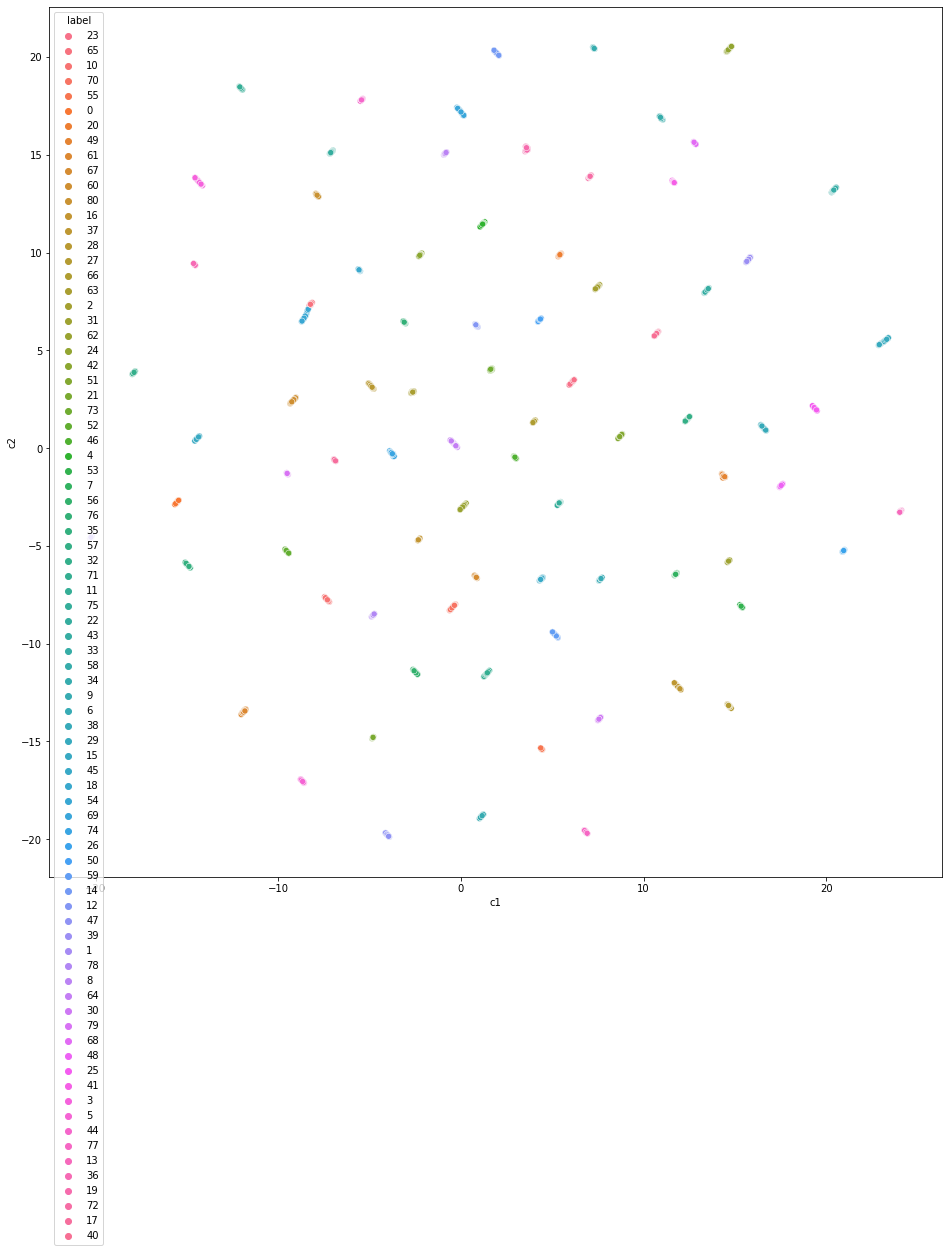

In [ ]:
plt.figure(figsize=(16, 16))
sns.scatterplot(x="c1", y="c2", data=df_feats_reduced_train, hue='label')

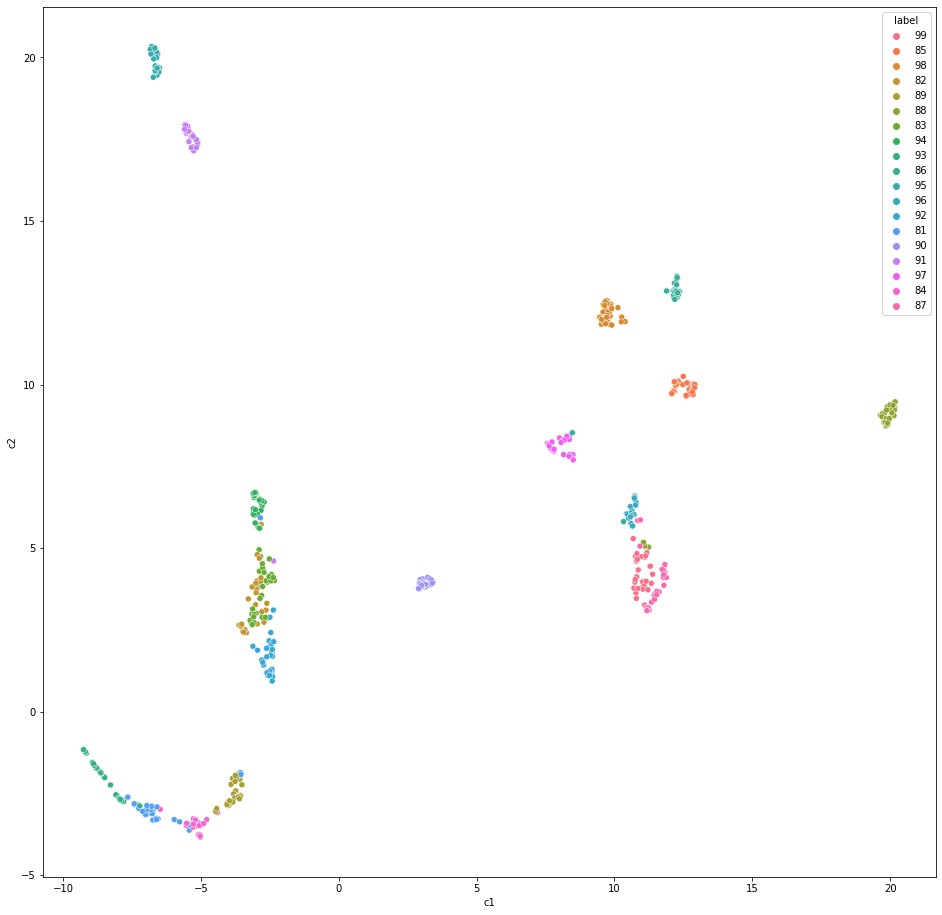

In [ ]:
plt.figure(figsize=(16, 16))
sns.scatterplot(x="c1", y="c2", data=df_feats_reduced_test, hue='label')

In [ ]:
cos_sims = []
label1s = []
label2s = []
identities = []

for feat1, label1 in zip(pb(feats+feats_test), labels+labels_test):
    for feat2, label2 in zip(feats+feats_test, labels+labels_test):
        cos_sims.append(cos_sim(feat1, feat2))
        label1s.append(label1)
        label2s.append(label2)
        identities.append(label1==label2)

In [ ]:
df_cos_sim = pd.DataFrame({
    'cos_sim': cos_sims,
    'label1': label1s,
    'label2s': label2s,
    'identity': identities
})

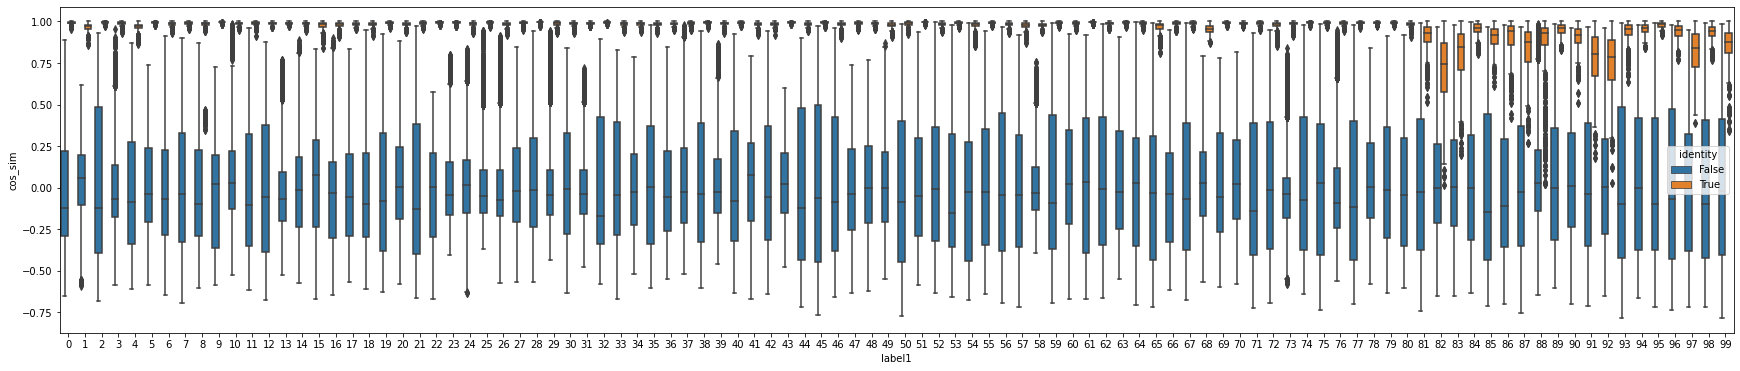

In [ ]:
plt.figure(figsize=(30, 6))
sns.boxplot(data=df_cos_sim, x="label1", y="cos_sim", hue="identity")

In [ ]:
centroids = {}

for lbl in pb(set(labels)):
    centroid = np.stack([f for f, lbl2 in zip(feats, labels) if lbl2 == lbl]).mean(axis=0)
    centroids[lbl] = centroid

In [ ]:
np.stack(feats_test).mean(axis=0).shape

(256,)

In [ ]:
cos_sims_centroid = []
label1s_centroid = []
labels_centroid = []
identities_centroid = []

for feat1, label1 in zip(pb(feats+feats_test), labels+labels_test):
    for lbl_centroid, feat_centroid in centroids.items():
        cos_sims_centroid.append(cos_sim(feat1, feat_centroid))
        labels_centroid.append(lbl_centroid)
        label1s_centroid.append(label1)
        identities_centroid.append(label1==lbl_centroid)

In [ ]:
len(cos_sims_centroid), len(labels_centroid), len(label1s_centroid), len(identities_centroid)

(243000, 243000, 243000, 243000)

In [ ]:
df_cos_sim_centroid = pd.DataFrame({
    'cos_sim': cos_sims_centroid,
    'label_centroid': labels_centroid,
    'label': label1s_centroid,
    'identity': identities_centroid
})

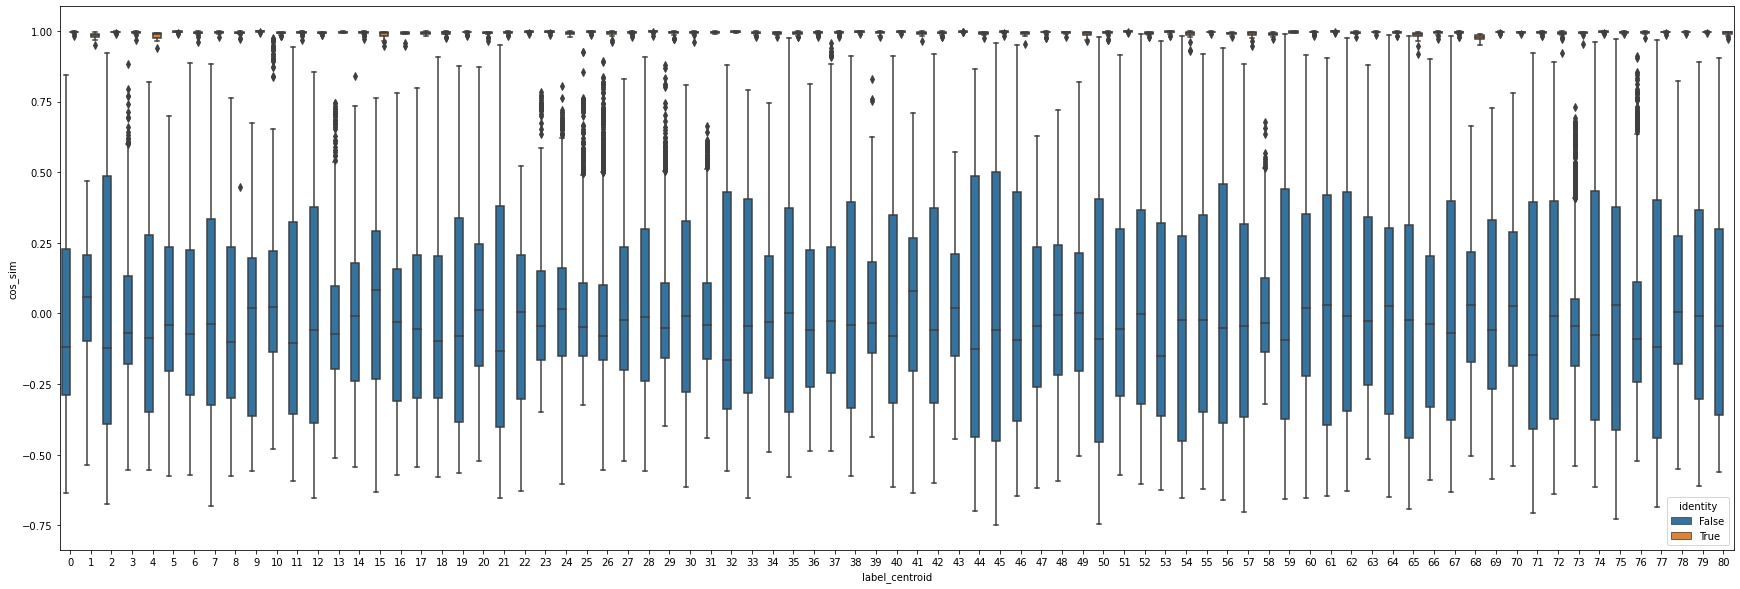

In [ ]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=df_cos_sim_centroid, x="label_centroid", y="cos_sim", hue="identity")

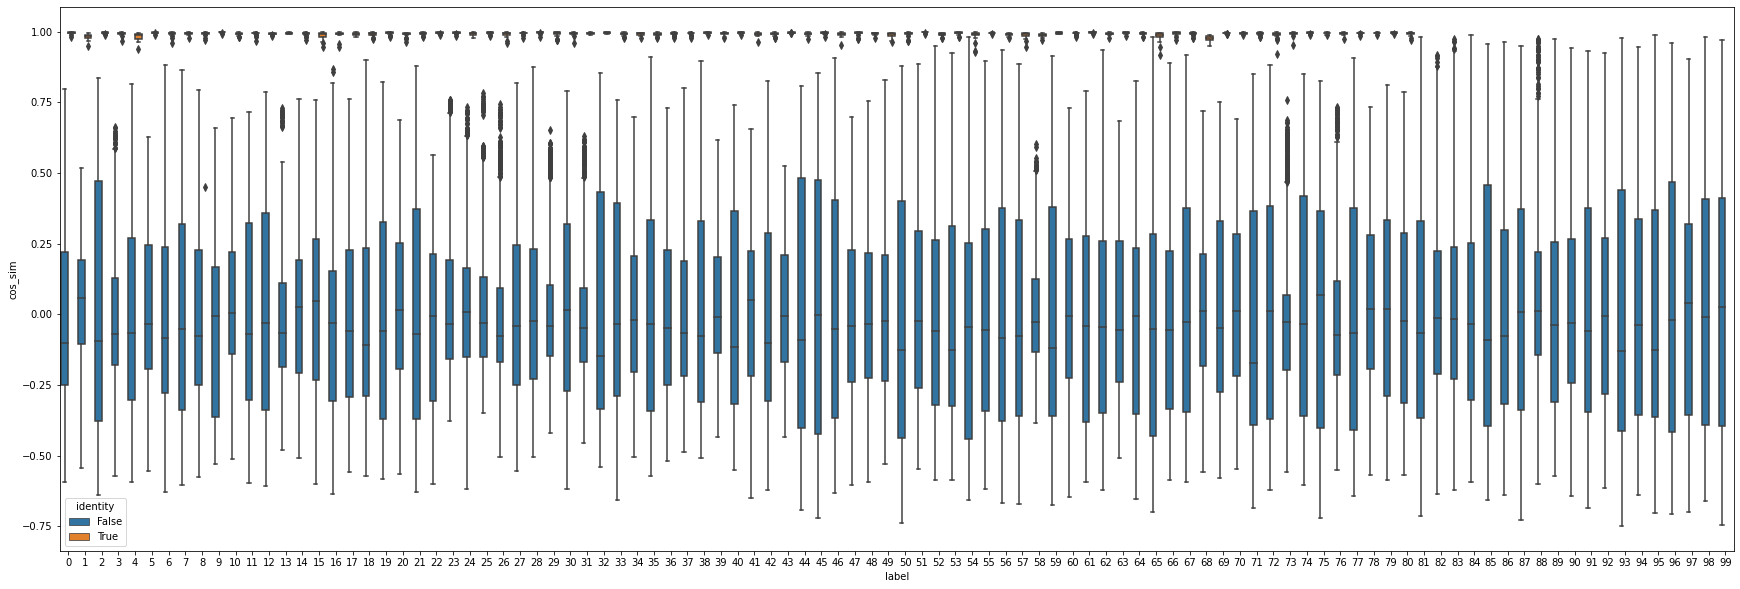

In [ ]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=df_cos_sim_centroid, x="label", y="cos_sim", hue="identity")

In [ ]:
cos_sim_thres = 0.9

In [ ]:
(df_cos_sim_centroid[df_cos_sim_centroid['identity']]['cos_sim'] >= cos_sim_thres).value_counts()

True     2448
False       1
Name: cos_sim, dtype: int64

In [ ]:
(df_cos_sim_centroid[~df_cos_sim_centroid['identity']]['cos_sim'] < cos_sim_thres).value_counts()

True     240051
False       500
Name: cos_sim, dtype: int64

In [ ]:
# test data
(df_cos_sim_centroid[(df_cos_sim_centroid['label']>80) & (~df_cos_sim_centroid['identity'])]['cos_sim'] < cos_sim_thres).value_counts()

True     44250
False      381
Name: cos_sim, dtype: int64

### 2.Pretrained Wav2Vec2 x Deep Metric Learning

In [50]:
!zip -r wav2vec2_jvs_228_80clstrain.zip /content/model1/checkpoint-228

	zip warning: name not matched: /content/model1/checkpoint-228

zip error: Nothing to do! (try: zip -r wav2vec2_jvs_228_80clstrain.zip . -i /content/model1/checkpoint-228)


In [ ]:
# !cp /content/wav2vec2_jvs_228_80clstrain.zip /content/drive/MyDrive/wav2vec2_jvs_228_80clstrain.zip

In [58]:
!pip install pytorch-metric-learning[with-hooks]
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 14.3 MB/s 
     |████████████████████████████████| 85.5 MB 81 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 6.4 MB/s 
     |████████████████████████████████| 1.1 MB 67.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=44875d9ec27dfb54040edab520d4482dc64015aa84c16dd89e294f97444b3dba
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=08875c0563123d7dda6c26c6b50f7d0dafae2471e24134d8d3eee5c447d2e484
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent

In [51]:
!cp /content/drive/MyDrive/wav2vec2_jvs_228_80clstrain.zip /content/wav2vec2_jvs_228_80clstrain.zip

In [52]:
!unzip wav2vec2_jvs_228_80clstrain.zip

Archive:  wav2vec2_jvs_228_80clstrain.zip
   creating: content/model1/checkpoint-228/
  inflating: content/model1/checkpoint-228/training_args.bin  
  inflating: content/model1/checkpoint-228/pytorch_model.bin  
  inflating: content/model1/checkpoint-228/optimizer.pt  
  inflating: content/model1/checkpoint-228/config.json  
  inflating: content/model1/checkpoint-228/preprocessor_config.json  
  inflating: content/model1/checkpoint-228/rng_state.pth  
  inflating: content/model1/checkpoint-228/scheduler.pt  
  inflating: content/model1/checkpoint-228/trainer_state.json  


In [53]:
import torch

In [158]:
trained_wav2vec2 = AutoModelForAudioClassification.from_pretrained(
    "/content/content/model1/checkpoint-228", num_labels=num_labels, label2id=label2id, id2label=id2label
)

In [159]:
trained_wav2vec2_extractor = AutoFeatureExtractor.from_pretrained("/content/content/model1/checkpoint-228")

In [160]:
trained_wav2vec2.classifier = torch.nn.Identity()

In [57]:
trained_wav2vec2(torch.randn(1, 80000))

SequenceClassifierOutput(loss=None, logits=tensor([[ 0.4526, -0.0437, -0.2782, -0.2419,  0.0919,  0.5153,  0.2897,  0.0752,
         -0.1640,  0.3980, -0.0504,  0.6009,  0.0177, -0.0559, -0.5808,  0.4536,
         -0.0176,  0.4632,  0.5680,  0.0047, -0.0027,  0.0979, -0.3026, -0.0554,
         -1.0261, -0.0606,  0.1979, -0.3607, -0.5118,  0.2828,  0.2307, -0.6592,
          0.3220,  0.3895, -0.2178,  0.5705, -0.1765, -0.6109,  0.6808, -0.1727,
          0.1735,  0.0875,  0.1978, -0.6427, -0.2116,  0.1676,  0.2972,  0.4966,
          0.2089, -0.4401, -1.0538, -0.3333,  0.2446, -0.5534, -0.4539, -0.0813,
          0.3915,  0.6915, -0.6974,  0.4668, -0.3316, -0.3112,  0.3955, -0.1066,
          0.7337,  0.6993,  0.7406,  0.9470, -0.6307,  0.2593, -0.3759,  0.1686,
         -0.3977,  0.0095,  0.4055,  0.2881,  0.2384, -0.1824, -0.1980,  0.0581,
         -0.1665, -0.6700, -0.4200, -0.3980,  0.4134, -0.6176,  0.3352, -0.4591,
          0.1062,  0.0969,  0.2719, -0.1289, -0.0930, -0.3822,  0.

In [59]:
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
import umap
from cycler import cycler
from torch import optim
import torch.nn as nn
from pytorch_metric_learning import trainers, testers
from pytorch_metric_learning.utils.accuracy_calculator import AccuracyCalculator
from pytorch_metric_learning.utils import logging_presets
from pytorch_metric_learning import losses, distances, regularizers

In [161]:
device = 'cuda'

In [162]:
class Trunk(torch.nn.Module):

    def __init__(self, w2v2_model):
        super(Trunk, self).__init__()
        self._w2v2_model = w2v2_model

    def forward(self, x):
        out = self._w2v2_model(x)
        return out.logits

class Embedder(torch.nn.Module):
    def __init__(self, in_dim: int = 256, out_dim: int = 128):
        super(Embedder, self).__init__()
        self.fc = nn.Linear(in_dim, out_dim)
     
    def forward(self, x):
        x = self.fc(x)
        return x

In [163]:
N_CLASS = len(df_wavs[df_wavs['train']]['label'].unique())
EMB_DIM = 128

In [164]:
N_CLASS

81

In [126]:
# distance = distances.CosineSimilarity()
# regularizer = regularizers.RegularFaceRegularizer()
# loss = losses.ArcFaceLoss(N_CLASS, EMB_DIM, margin=28.6, scale=64,
#                           weight_regularizer=regularizer, distance=distance)
# sampler = None

# loss_funcs = {"metric_loss": loss}
# mining_funcs = dict()

In [184]:
from pytorch_metric_learning import losses, miners, distances, reducers, samplers

distance = distances.CosineSimilarity()
reducer = reducers.ThresholdReducer(low=0)
loss = losses.TripletMarginLoss(margin=0.2, distance=distance, reducer=reducer)
miner = miners.TripletMarginMiner(margin=0.2, distance=distance, type_of_triplets="semihard")
sampler = samplers.MPerClassSampler([int(l) for l in encoded_audio_dataset["train"]['label']], m=4,
                                    length_before_new_iter=len(encoded_audio_dataset["train"]))

loss_funcs = {"metric_loss": loss}
mining_funcs = {"tuple_miner": miner}

In [185]:
trunk = Trunk(trained_wav2vec2).to(device)
trunk = torch.nn.DataParallel(trunk.to(device))
embedder = Embedder(out_dim=EMB_DIM).to(device)
embedder = torch.nn.DataParallel(embedder.to(device))
models = {"trunk": trunk, 'embedder': embedder}

In [186]:
# inputs['input_values'].shape

In [187]:
trunk_optimizer = optim.Adam(trunk.parameters(), lr=0.005)
embedder_optimizer = optim.Adam(embedder.parameters(), lr=0.001)
optimizers = {"trunk_optimizer": trunk_optimizer,
              "embedder_optimizer": embedder_optimizer}

In [188]:
record_keeper, _, _ = logging_presets.get_record_keeper("logs", "tensorboard")
hooks = logging_presets.get_hook_container(record_keeper)

In [189]:
def visualizer_hook(umapper, umap_embeddings, labels, split_name, keyname, epoch):
    class_labels = np.unique(labels)
    num_classes = len(class_labels)
    # class_labels = np.arange(100)
    # num_classes = 100

    fig = plt.figure(figsize=(8, 6))
    colors = [plt.cm.nipy_spectral(i) for i in np.linspace(0, 0.9, num_classes)]
    plt.gca().set_prop_cycle(cycler("color", colors))

    for i, lab in enumerate(class_labels):
        idx = labels == class_labels[i]
        plt.plot(umap_embeddings[idx, 0], umap_embeddings[idx, 1], ".", markersize=3, label=lab) 

    # plt.legend(frameon=False, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
    os.makedirs("result", exist_ok=True)
    plt.savefig(f"result/{epoch:02d}.png")
    plt.show()
    plt.close()

In [190]:
tester = testers.GlobalEmbeddingSpaceTester(
    # end_of_testing_hook=hooks.end_of_testing_hook, 
                                            visualizer=umap.UMAP(), 
                                            visualizer_hook=visualizer_hook,
                                            # dataloader_num_workers=1
                                            )

In [211]:
class EncodedAudioDatasetWrapper(torch.utils.data.Dataset):

    def __init__(self, encoded_audio_dataset):
        self._audio_dataset = encoded_audio_dataset

    def __len__(self):
        return len(self._audio_dataset)

    def __getitem__(self, idx):
        x = self._audio_dataset[int(idx)]['input_values']
        label = self._audio_dataset[int(idx)]['label']
        return torch.tensor(x), int(label)


class AudioDatasetWrapper(torch.utils.data.Dataset):

    def __init__(self, audio_dataset, feature_extractor):
        self._audio_dataset = audio_dataset
        self._fe = feature_extractor

    def __len__(self):
        return len(self._audio_dataset)

    def __getitem__(self, idx):
        inputs = self._fe(self._audio_dataset[idx]["audio"]["array"], sampling_rate=self._fe.sampling_rate, return_tensors="pt", max_length=16000*5, padding='max_length', truncation=True)
        x = inputs['input_values'].squeeze()
        label = self._audio_dataset[idx]['label']
        return x, int(label)

In [111]:
# trained_wav2vec2_extractor(audio_dataset['train'][0]["audio"]["array"], sampling_rate=trained_wav2vec2_extractor.sampling_rate, return_tensors="pt", max_length=16000*5, padding='max_length', truncation=True)['input_values'].shape

torch.Size([1, 80000])

In [212]:
train_dataset = EncodedAudioDatasetWrapper(encoded_audio_dataset["train"])
# test_dataset = EncodedAudioDatasetWrapper(encoded_audio_dataset["test"])
test_dataset = EncodedAudioDatasetWrapper(encoded_audio_dataset["train"])

In [213]:
# train_dataset = AudioDatasetWrapper(audio_dataset["train"], trained_wav2vec2_extractor)
# # test_dataset = EncodedAudioDatasetWrapper(encoded_audio_dataset["test"])
# test_dataset = AudioDatasetWrapper(audio_dataset["train"], trained_wav2vec2_extractor)

In [214]:
dataset_dict = {"val": test_dataset}
model_dir = "saved_models"
end_of_epoch_hook = hooks.end_of_epoch_hook(tester, 
                                            dataset_dict, 
                                            model_dir, 
                                            test_interval=1,
                                            patience=1)

In [215]:
num_epochs = 20
batch_size = 4

In [216]:
trainer = trainers.MetricLossOnly(models,
                                  optimizers,
                                  batch_size,
                                  loss_funcs,
                                  mining_funcs,
                                  train_dataset,
                                  sampler=sampler,
                                #   dataloader_num_workers=1,
                                  end_of_iteration_hook=hooks.end_of_iteration_hook,
                                  end_of_epoch_hook=end_of_epoch_hook)

100%|██████████| 77/77 [02:46<00:00,  2.17s/it]


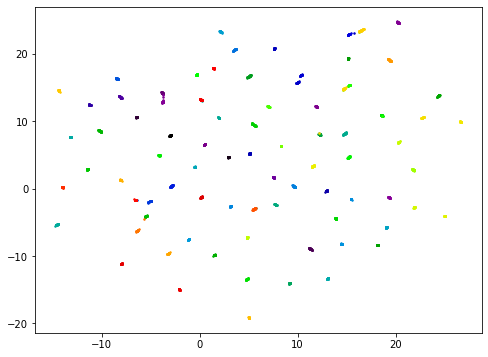

100%|██████████| 77/77 [02:56<00:00,  2.29s/it]


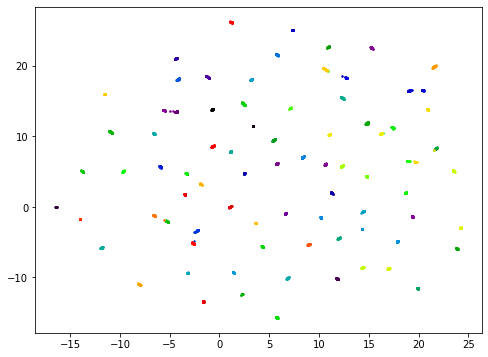

100%|██████████| 77/77 [03:19<00:00,  2.59s/it]


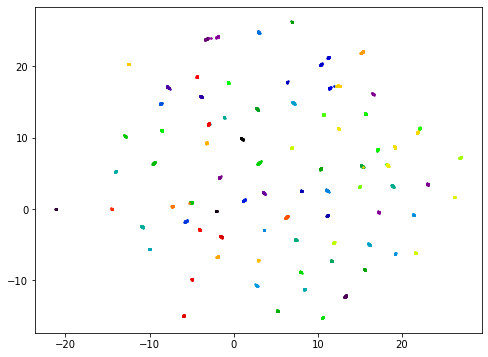

100%|██████████| 77/77 [02:41<00:00,  2.10s/it]


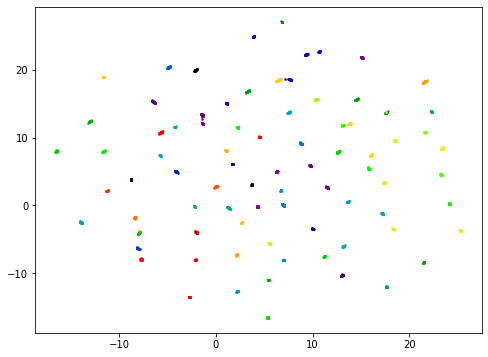

100%|██████████| 77/77 [03:14<00:00,  2.53s/it]


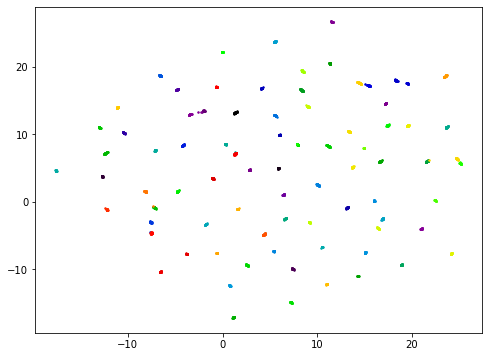

KeyboardInterrupt: ignored

In [217]:
# Triplet loss
trainer.train(num_epochs=num_epochs)

100%|██████████| 76/76 [02:39<00:00,  2.10s/it]


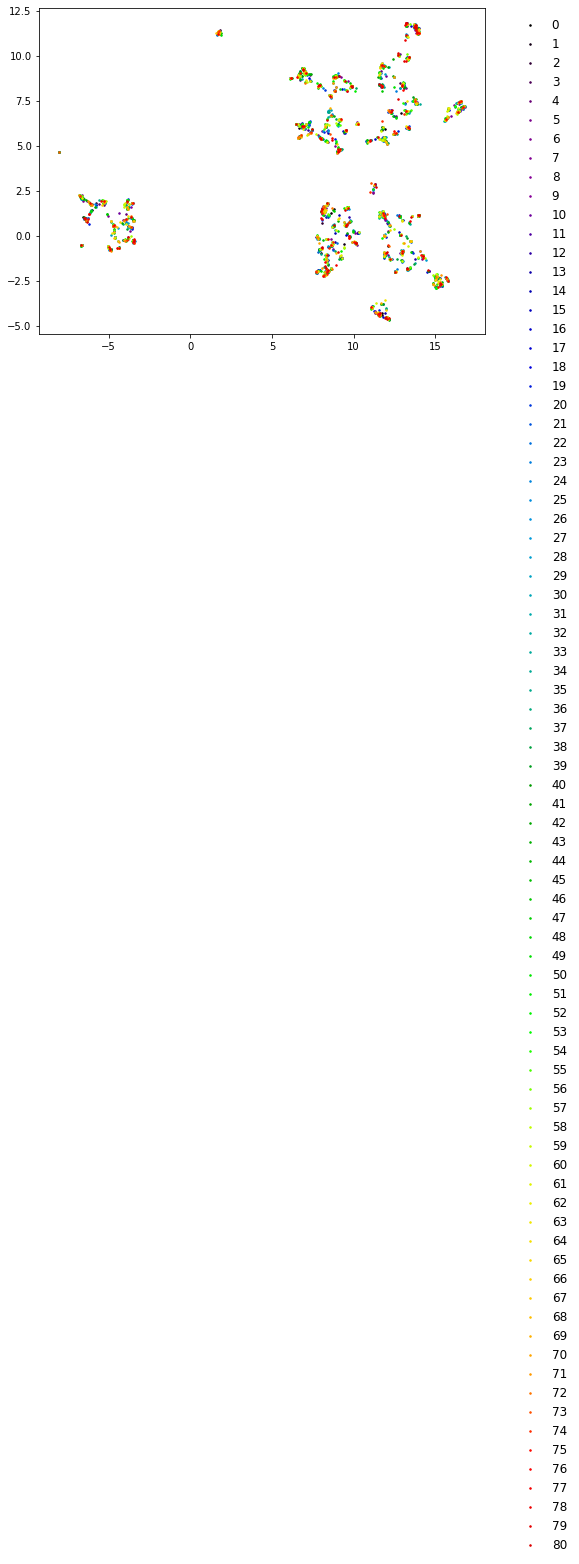

100%|██████████| 76/76 [02:34<00:00,  2.03s/it]


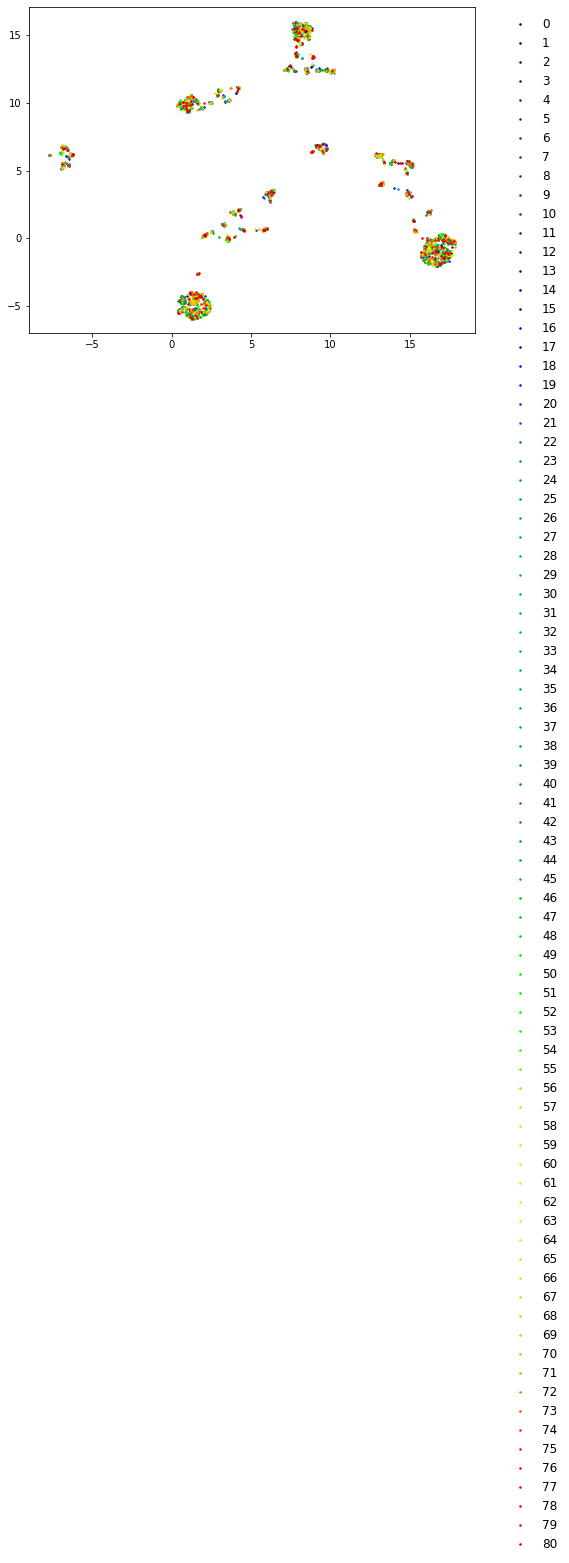

100%|██████████| 76/76 [02:40<00:00,  2.11s/it]


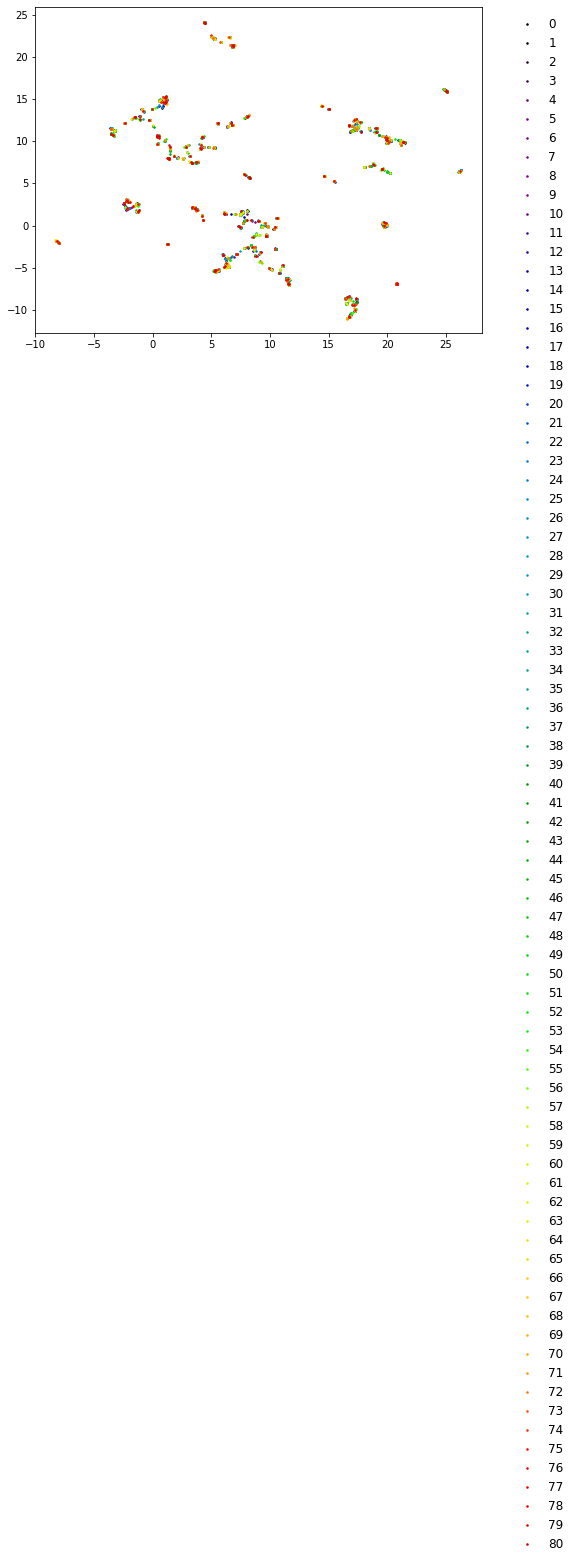

100%|██████████| 76/76 [02:32<00:00,  2.01s/it]


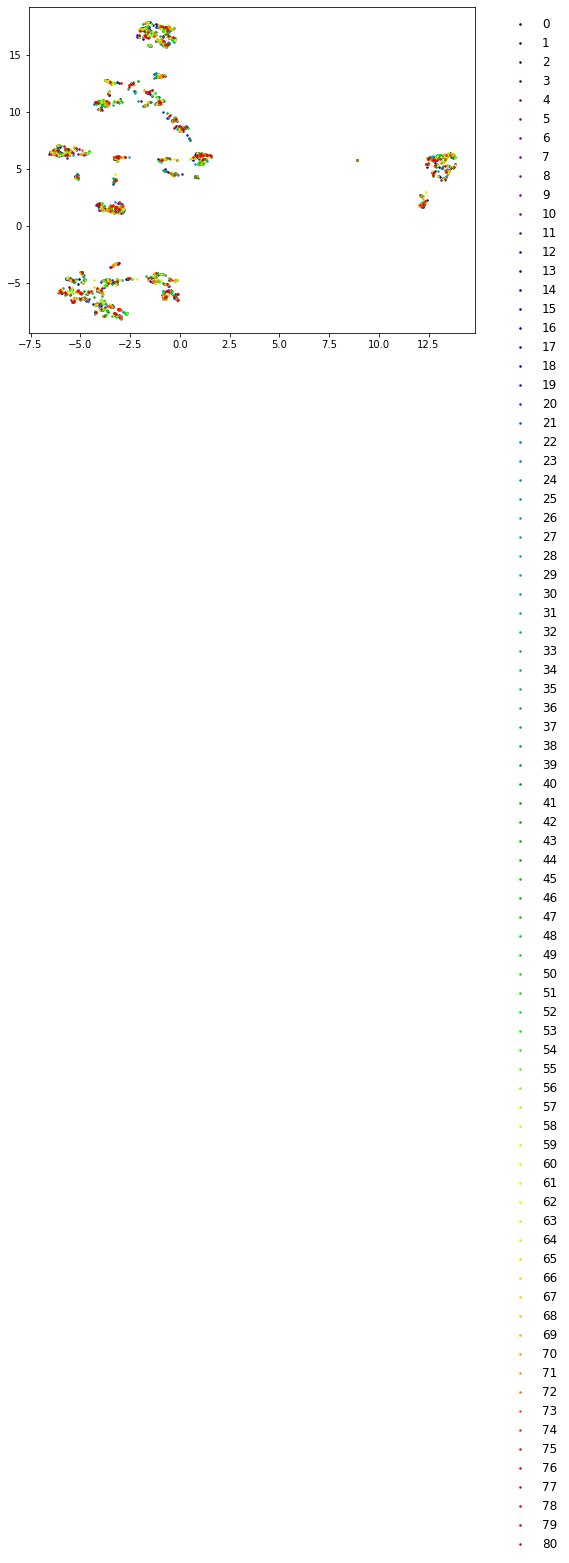

100%|██████████| 76/76 [02:33<00:00,  2.02s/it]


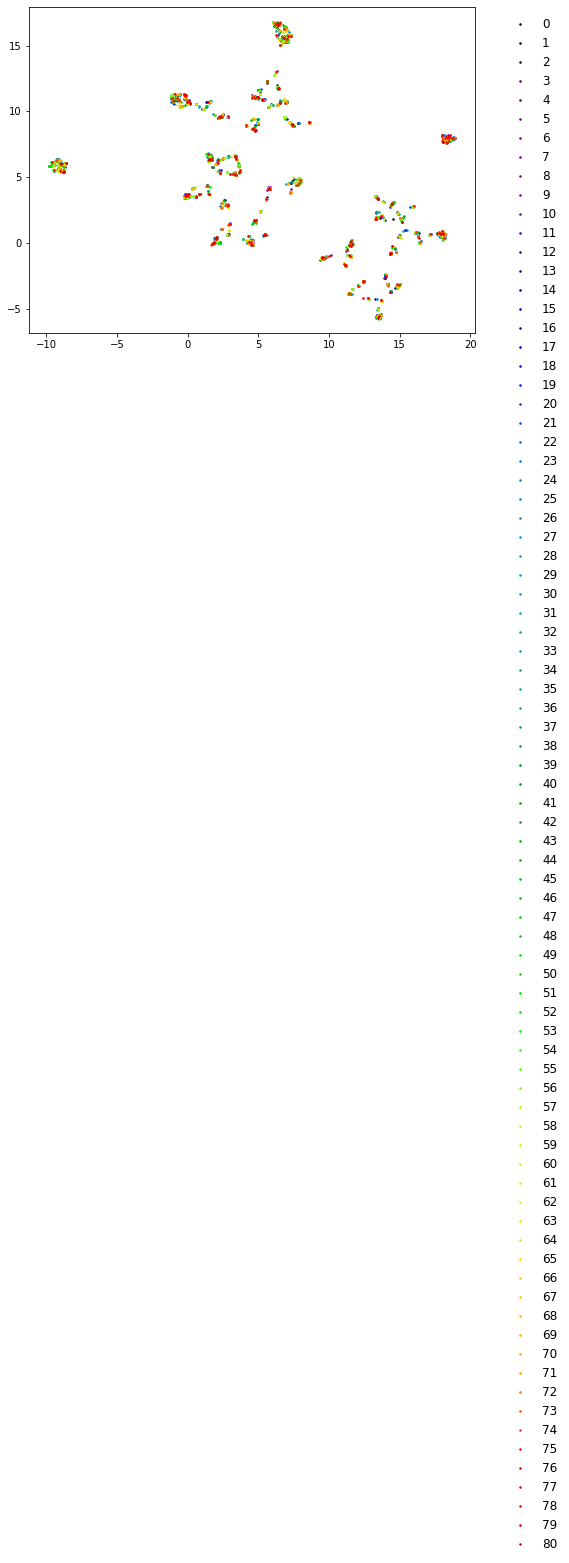

100%|██████████| 76/76 [02:42<00:00,  2.14s/it]


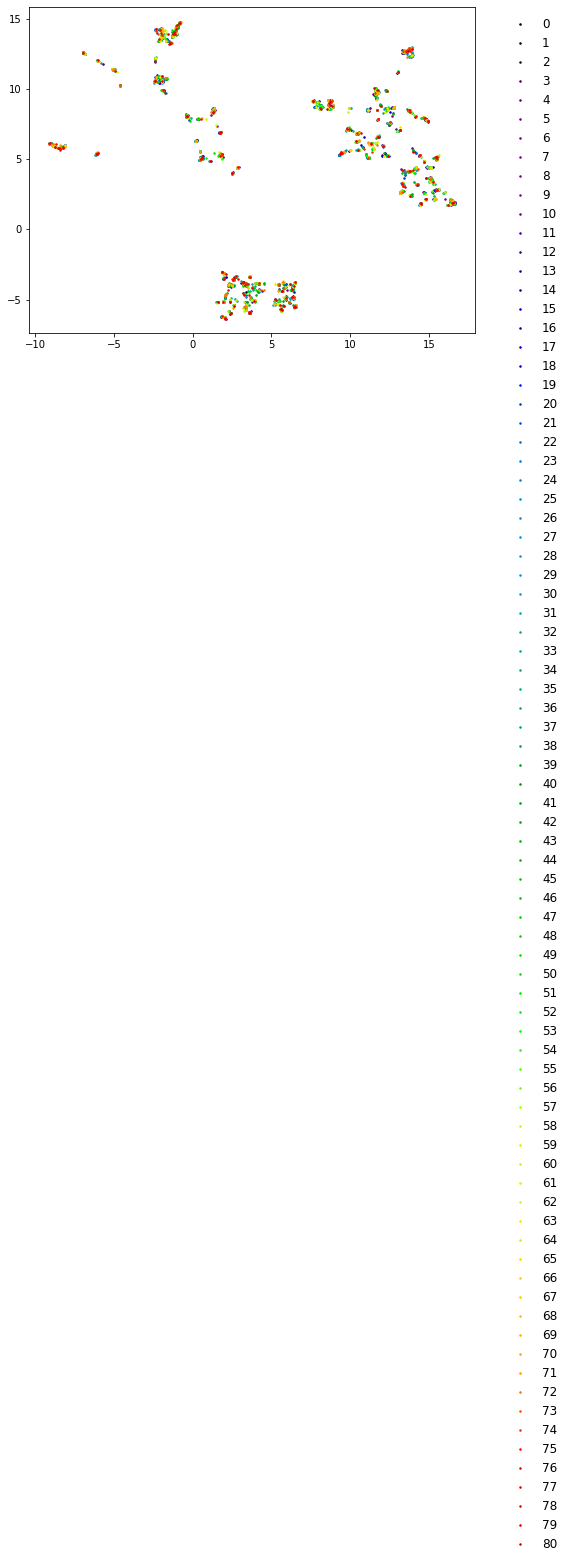

100%|██████████| 76/76 [02:34<00:00,  2.03s/it]


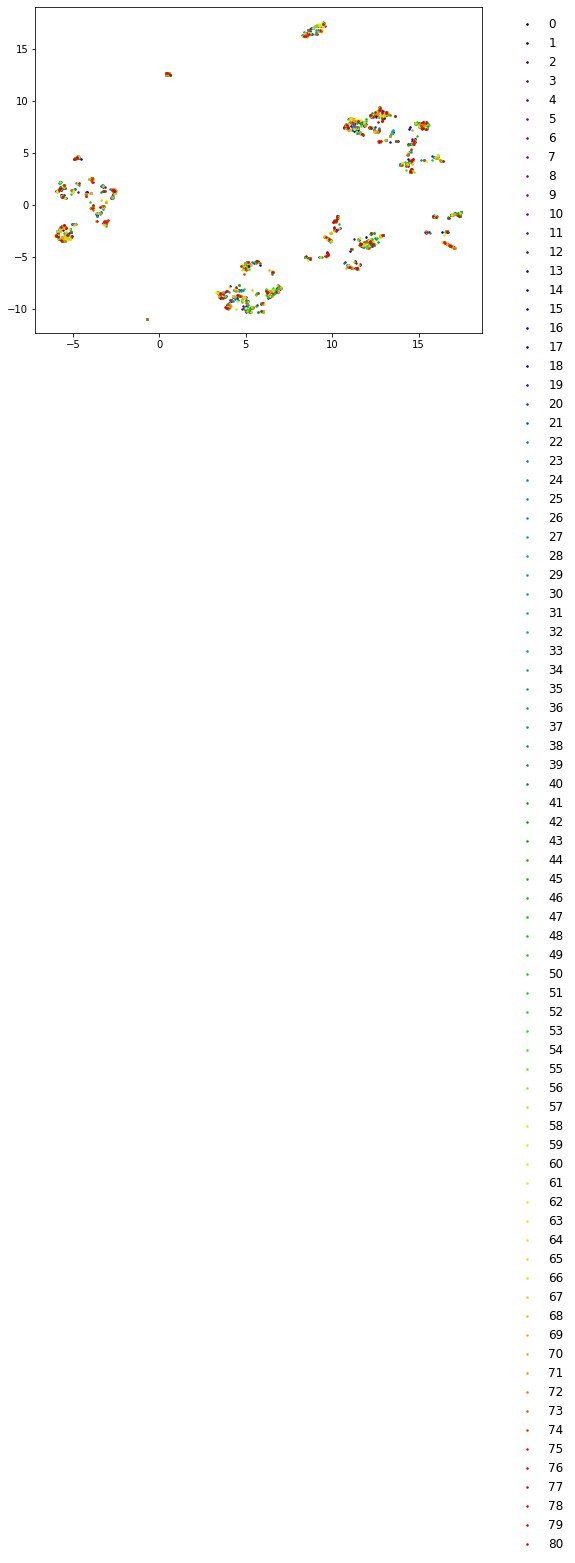

100%|██████████| 76/76 [02:33<00:00,  2.02s/it]


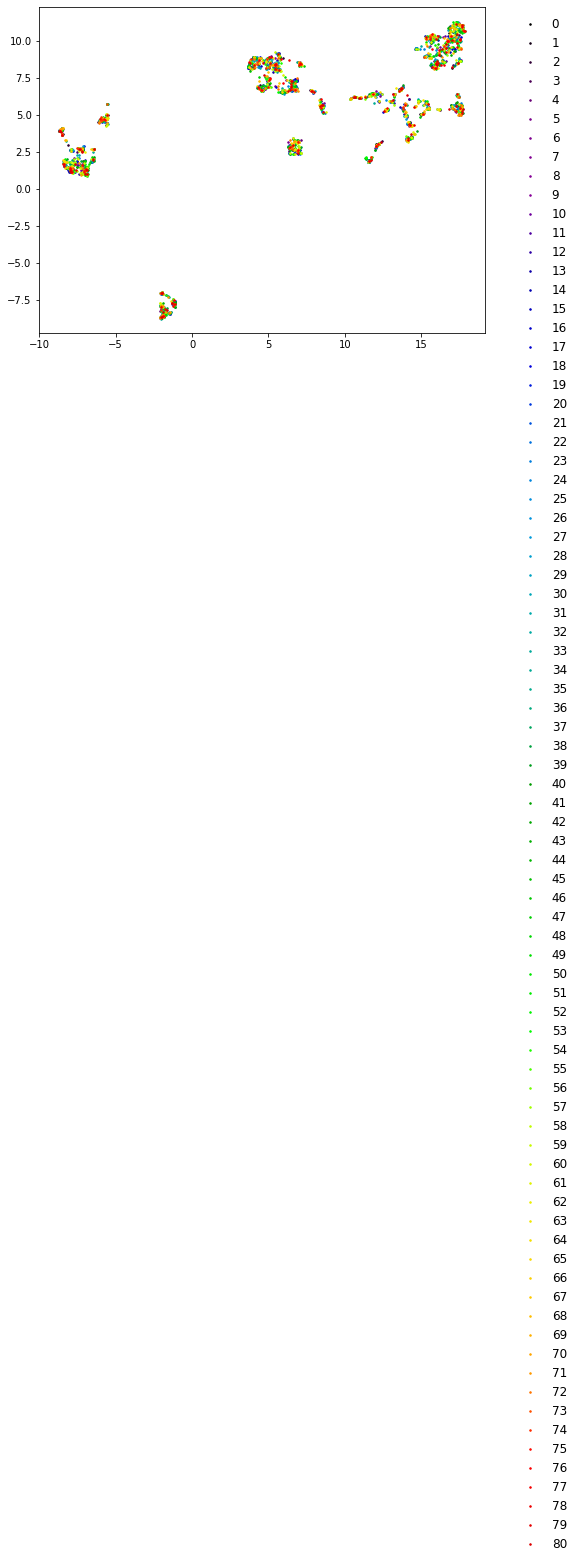

100%|██████████| 76/76 [02:34<00:00,  2.03s/it]


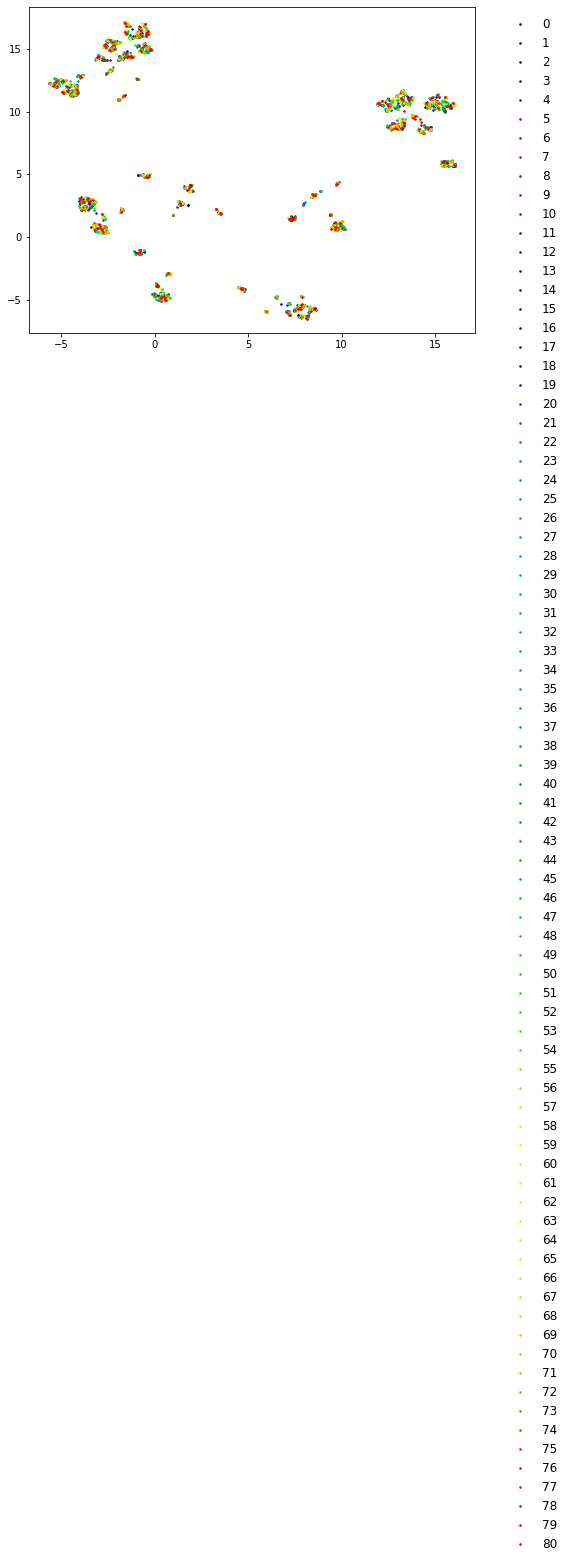

100%|██████████| 76/76 [02:33<00:00,  2.02s/it]


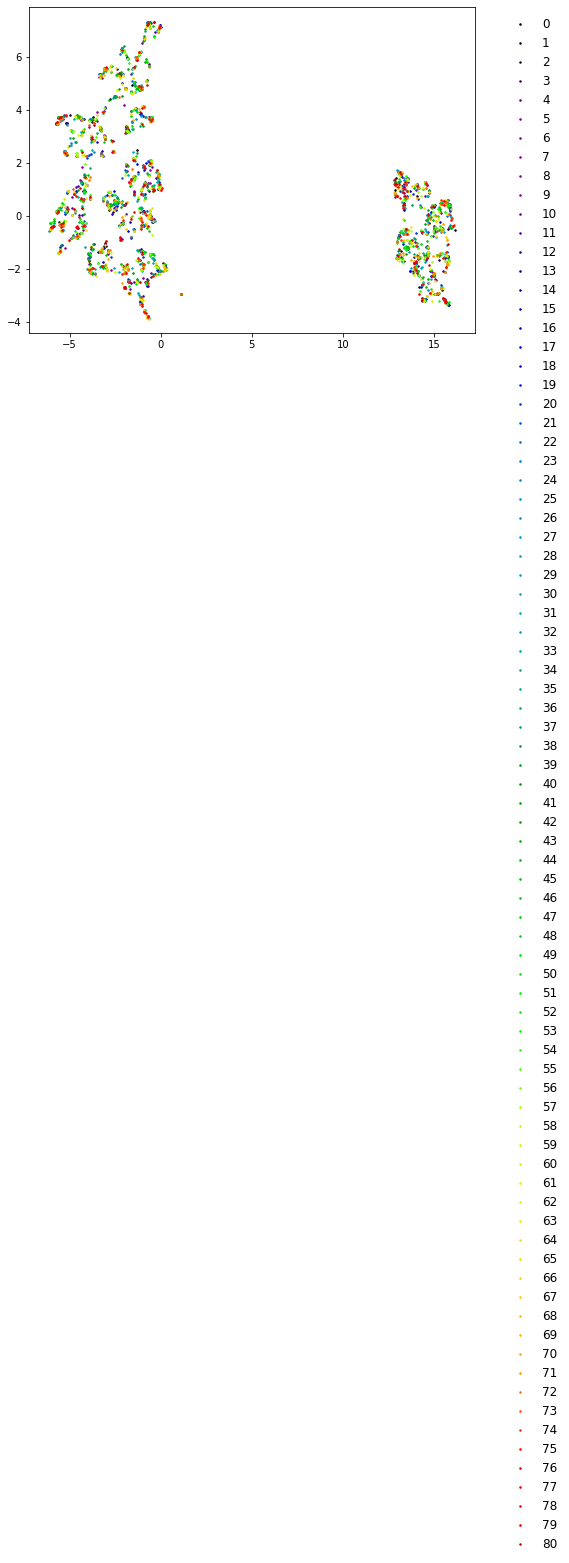

100%|██████████| 76/76 [02:34<00:00,  2.04s/it]


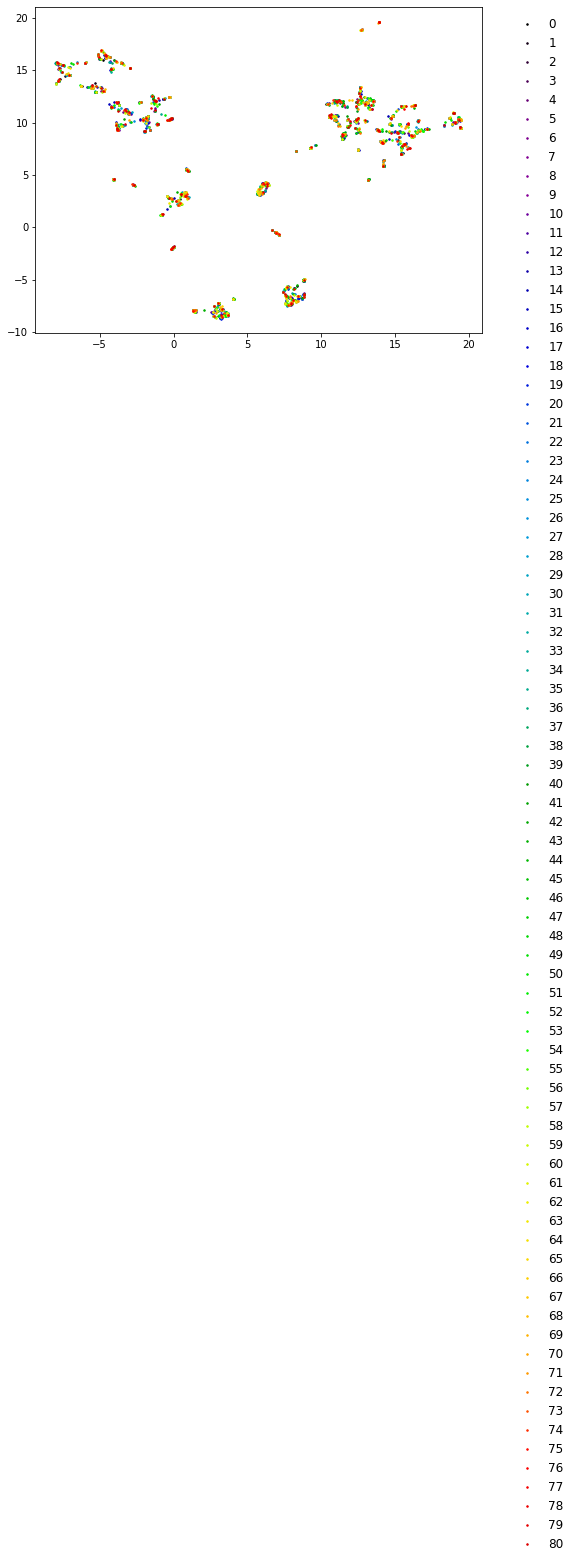

100%|██████████| 76/76 [02:35<00:00,  2.04s/it]


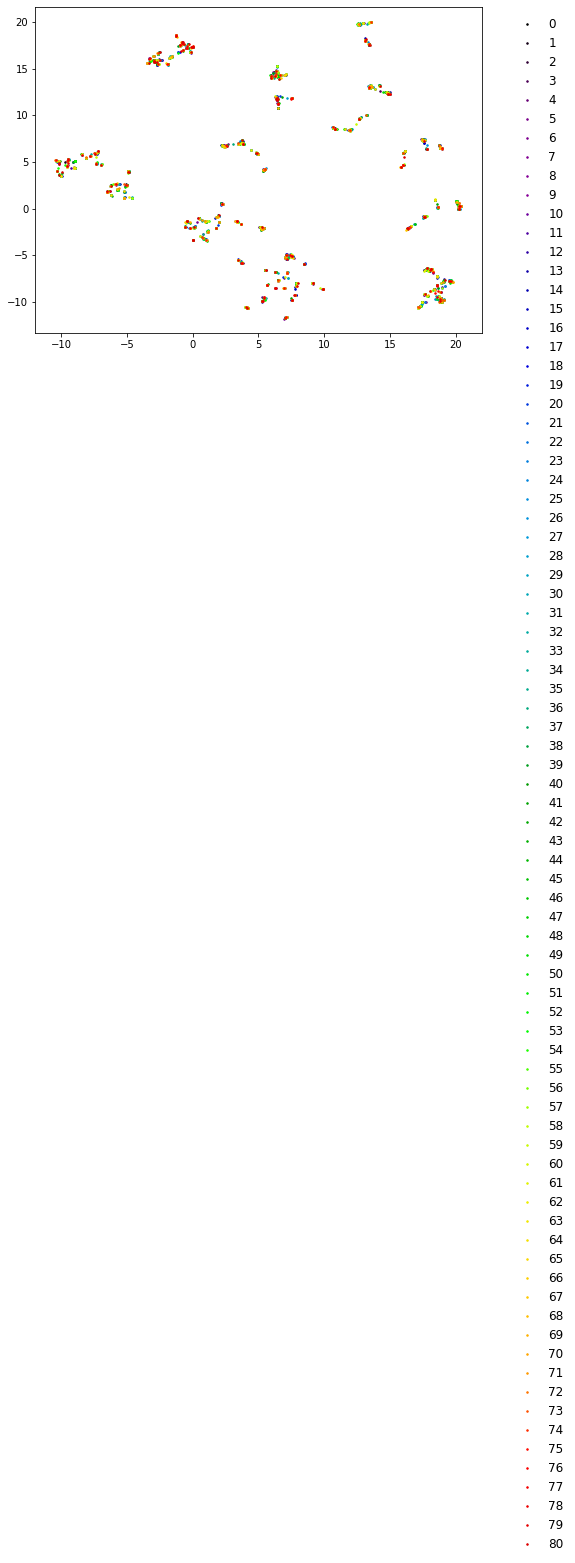

100%|██████████| 76/76 [02:33<00:00,  2.02s/it]


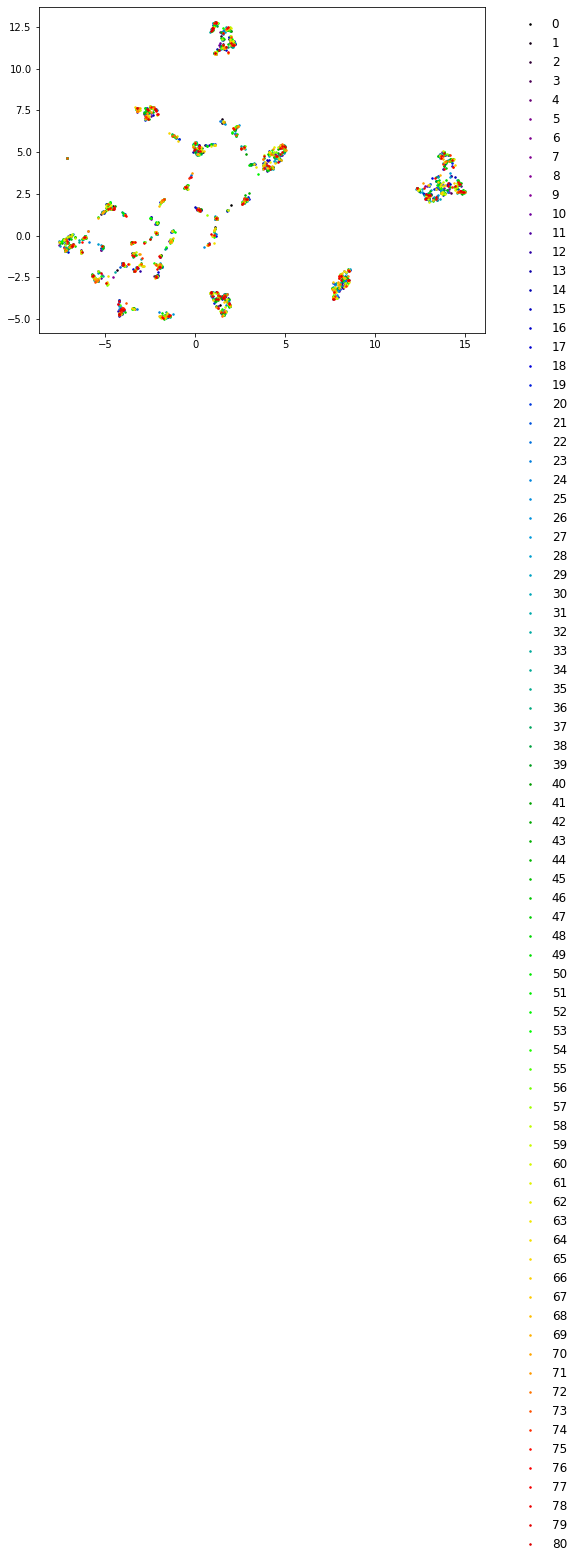

100%|██████████| 76/76 [02:33<00:00,  2.02s/it]


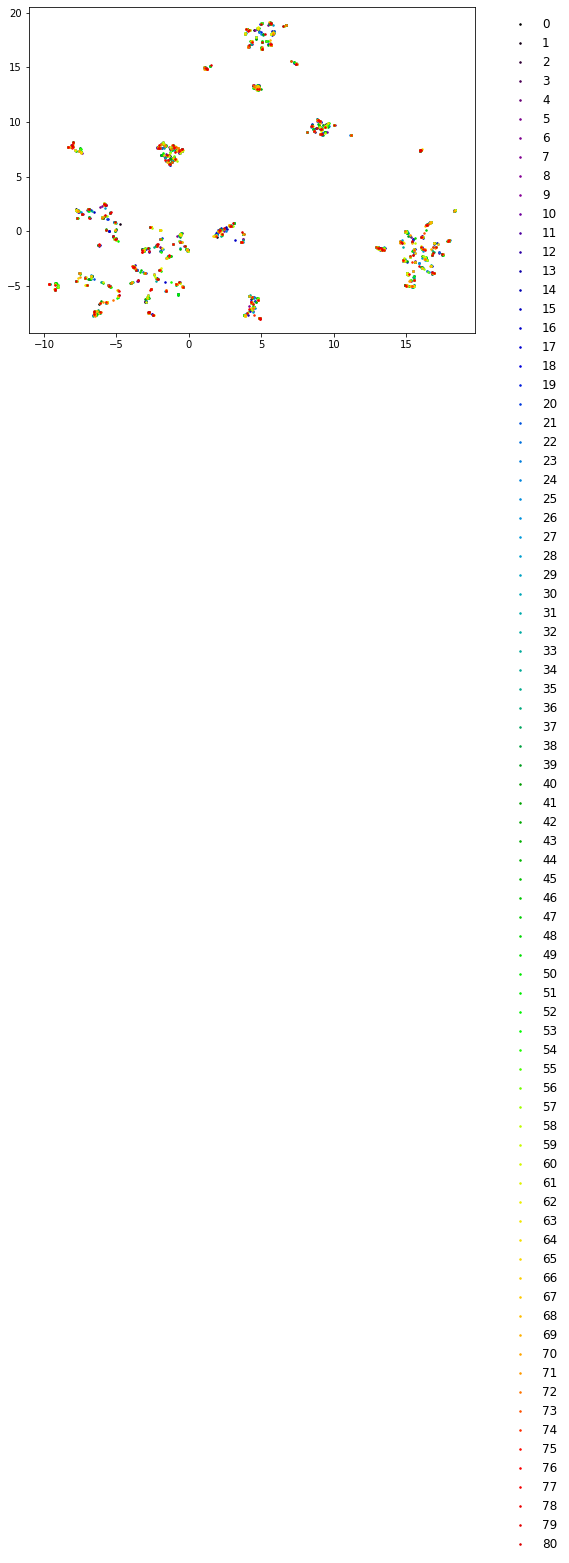

100%|██████████| 76/76 [02:33<00:00,  2.02s/it]


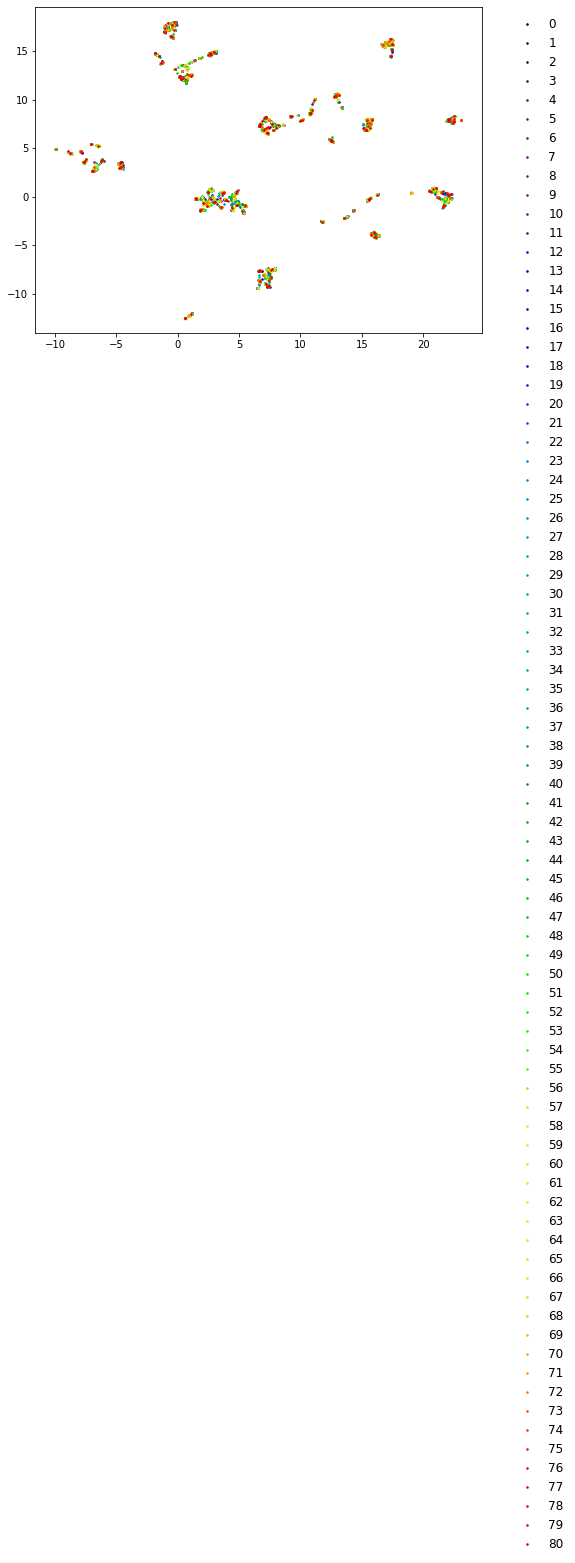

100%|██████████| 76/76 [02:34<00:00,  2.03s/it]


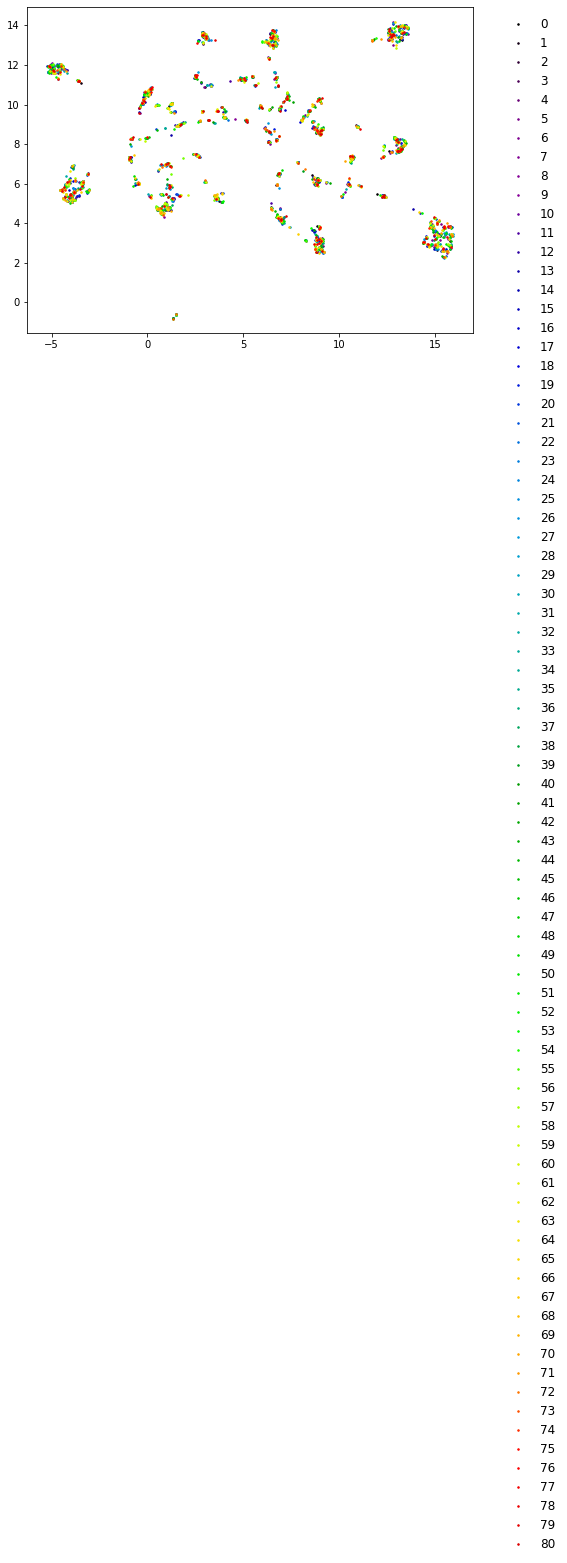

100%|██████████| 76/76 [02:34<00:00,  2.03s/it]


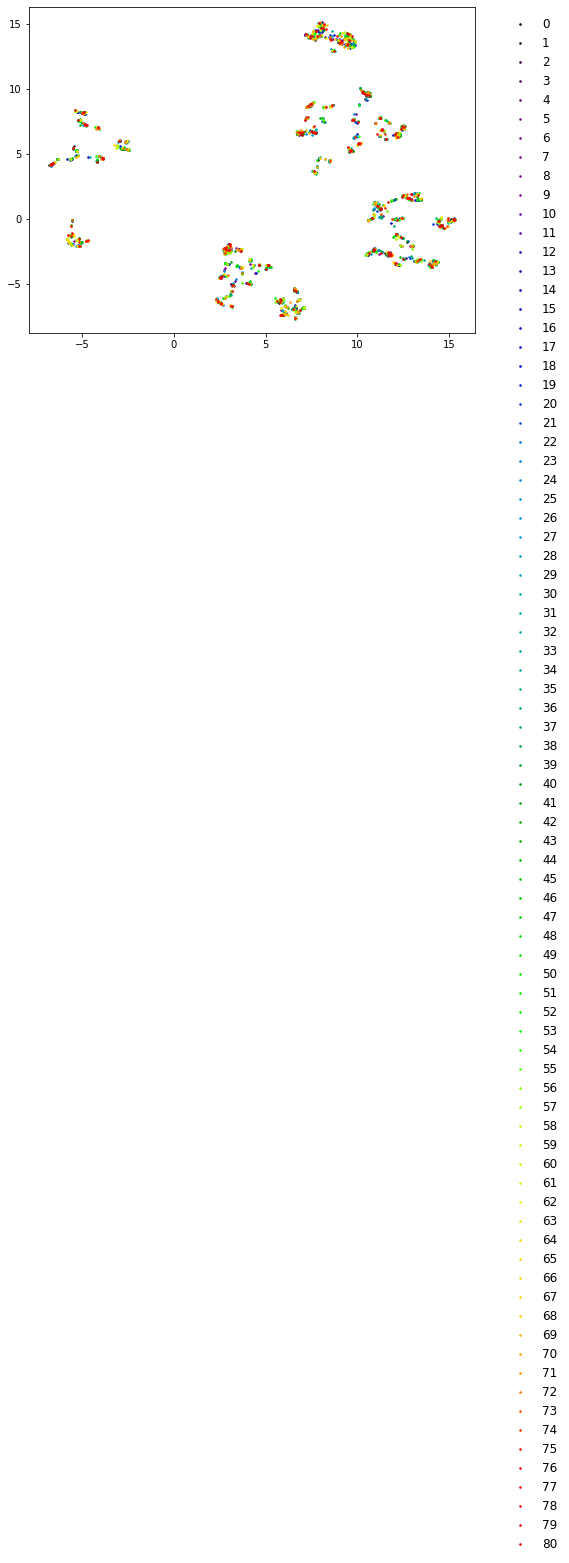

100%|██████████| 76/76 [02:30<00:00,  1.98s/it]


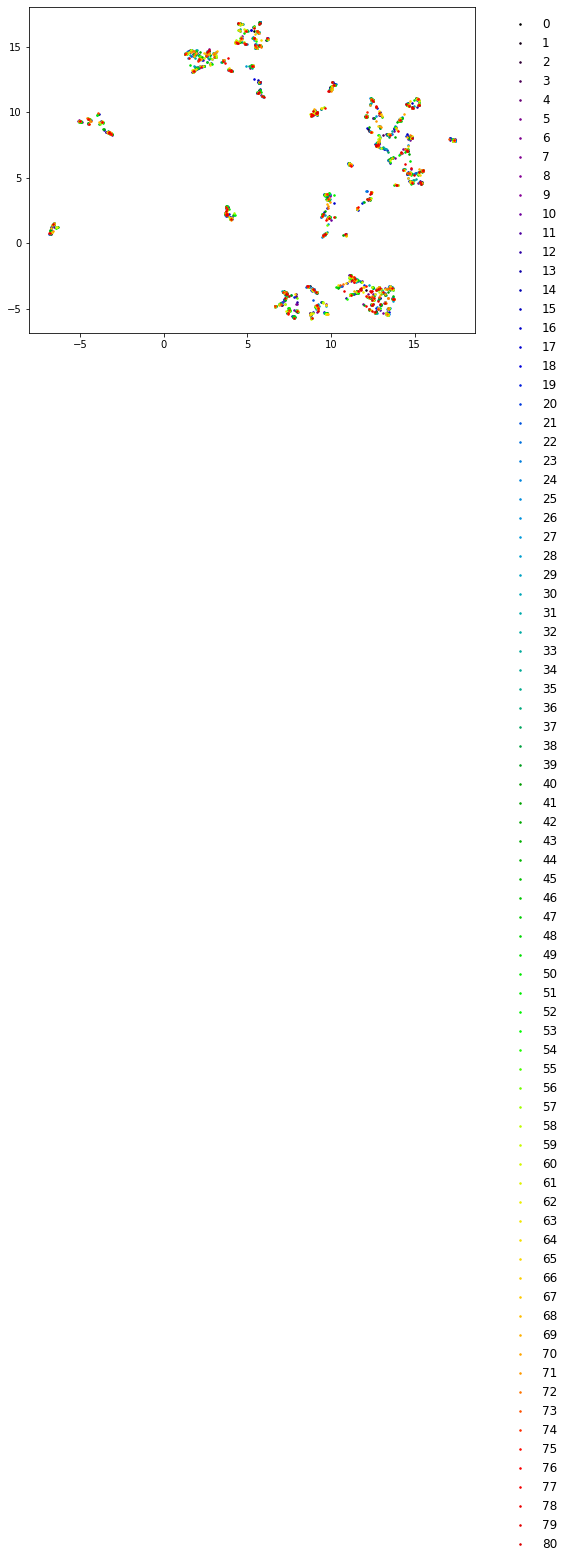

100%|██████████| 76/76 [02:32<00:00,  2.00s/it]


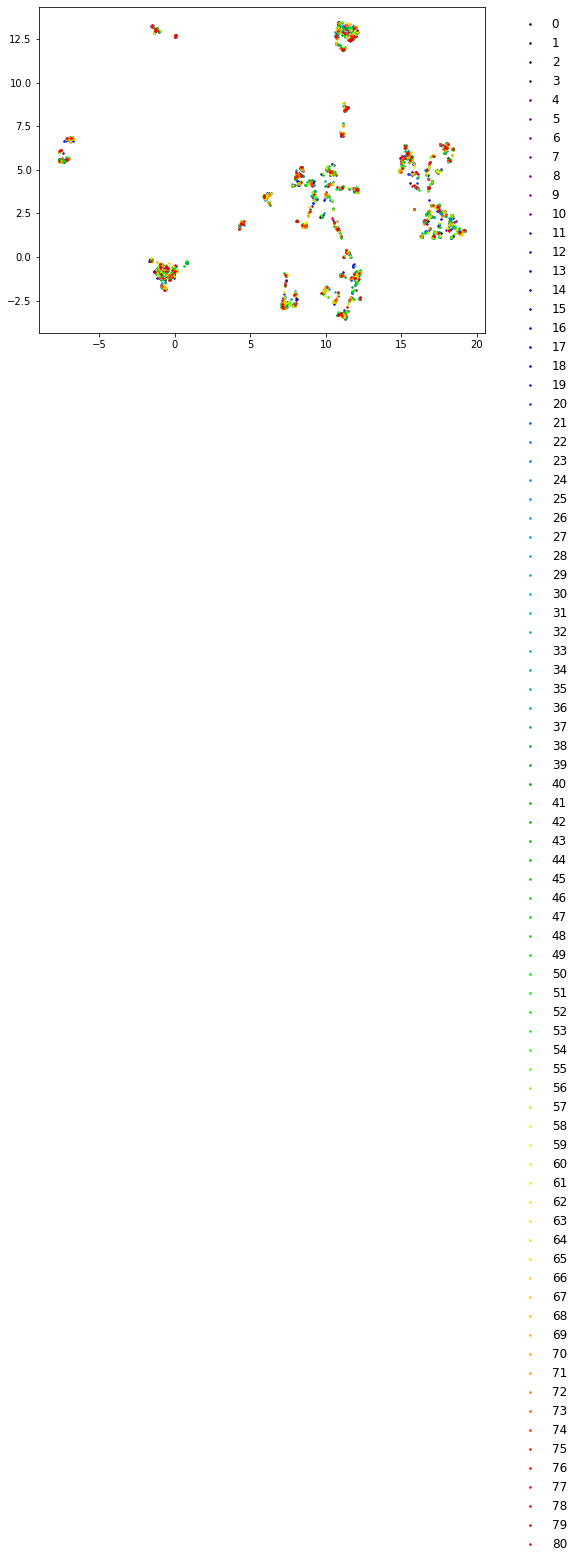

100%|██████████| 76/76 [02:32<00:00,  2.00s/it]


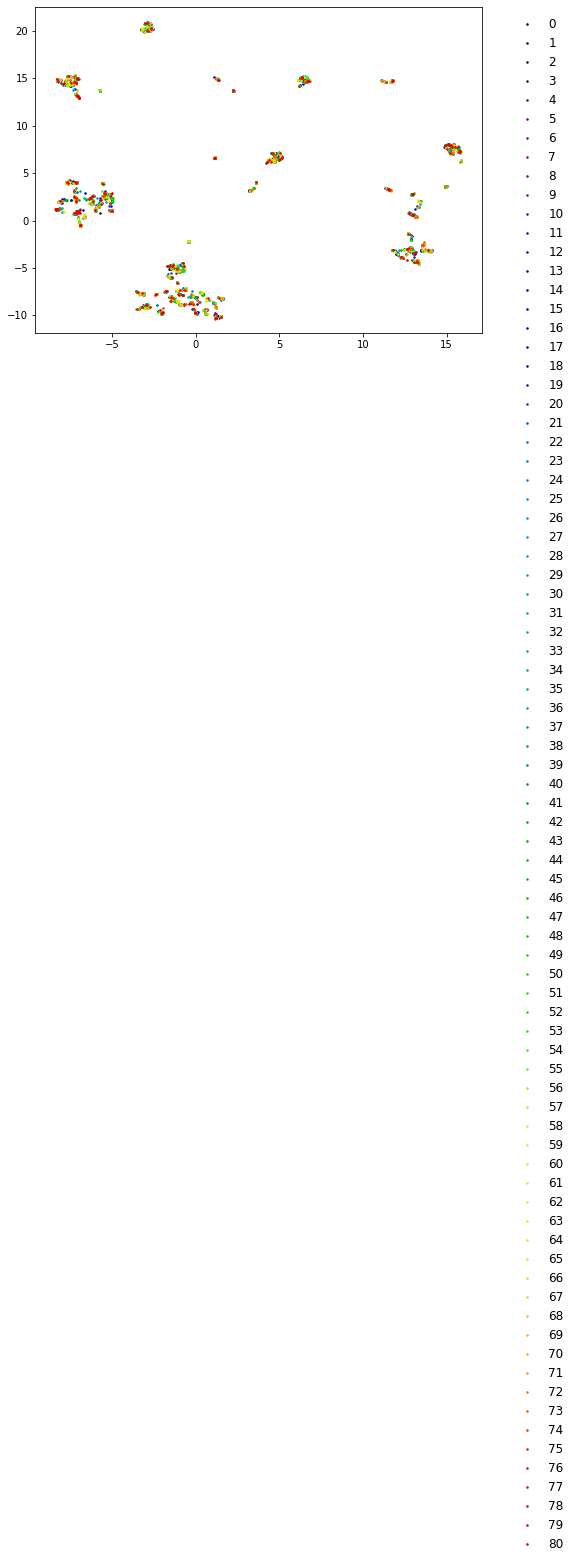

In [126]:
# Arc Face
trainer.train(num_epochs=num_epochs)

In [232]:
import seaborn as sns

In [223]:
labels = []
feats = []

for d in pb(encoded_audio_dataset['train']):
    with torch.no_grad():
        feats.append(embedder(trunk(torch.tensor(d['input_values']).unsqueeze(0))).squeeze().cpu().detach().numpy())
    labels.append(d['label'])

In [224]:
labels_test = []
feats_test = []

for d in pb(encoded_audio_dataset['test']):
    with torch.no_grad():
        feats_test.append(embedder(trunk(torch.tensor(d['input_values']).unsqueeze(0))).squeeze().cpu().detach().numpy())
    labels_test.append(d['label'])

In [225]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [239]:
cos_sims = []
label1s = []
label2s = []
identities = []

for feat1, label1 in zip(pb(feats+feats_test), labels+labels_test):
    for feat2, label2 in zip(feats+feats_test, labels+labels_test):
        cos_sims.append(cos_sim(feat1, feat2))
        label1s.append(label1)
        label2s.append(label2)
        identities.append(label1==label2)

In [240]:
df_cos_sim = pd.DataFrame({
    'cos_sim': cos_sims,
    'label1': label1s,
    'label2s': label2s,
    'identity': identities
})

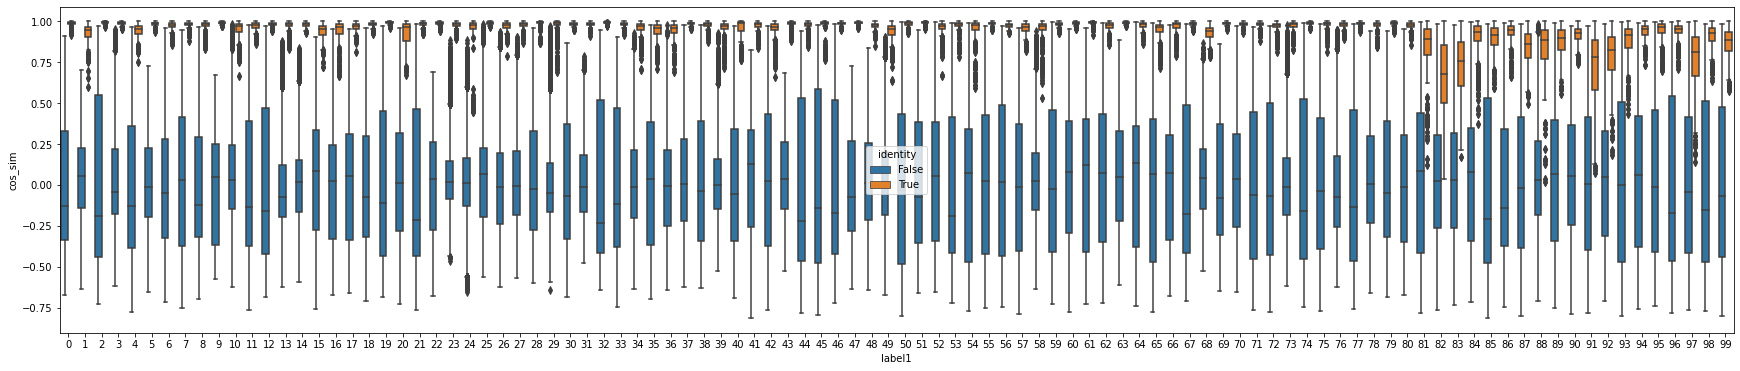

In [241]:
plt.figure(figsize=(30, 6))
sns.boxplot(data=df_cos_sim, x="label1", y="cos_sim", hue="identity")

In [226]:
centroids = {}

for lbl in pb(set(labels)):
    centroid = np.stack([f for f, lbl2 in zip(feats, labels) if lbl2 == lbl]).mean(axis=0)
    centroids[lbl] = centroid

In [227]:
np.stack(feats_test).mean(axis=0).shape

(128,)

In [228]:
cos_sims_centroid = []
label1s_centroid = []
labels_centroid = []
identities_centroid = []

for feat1, label1 in zip(pb(feats+feats_test), labels+labels_test):
    for lbl_centroid, feat_centroid in centroids.items():
        cos_sims_centroid.append(cos_sim(feat1, feat_centroid))
        labels_centroid.append(lbl_centroid)
        label1s_centroid.append(label1)
        identities_centroid.append(label1==lbl_centroid)

In [229]:
len(cos_sims_centroid), len(labels_centroid), len(label1s_centroid), len(identities_centroid)

(243000, 243000, 243000, 243000)

In [230]:
df_cos_sim_centroid = pd.DataFrame({
    'cos_sim': cos_sims_centroid,
    'label_centroid': labels_centroid,
    'label': label1s_centroid,
    'identity': identities_centroid
})

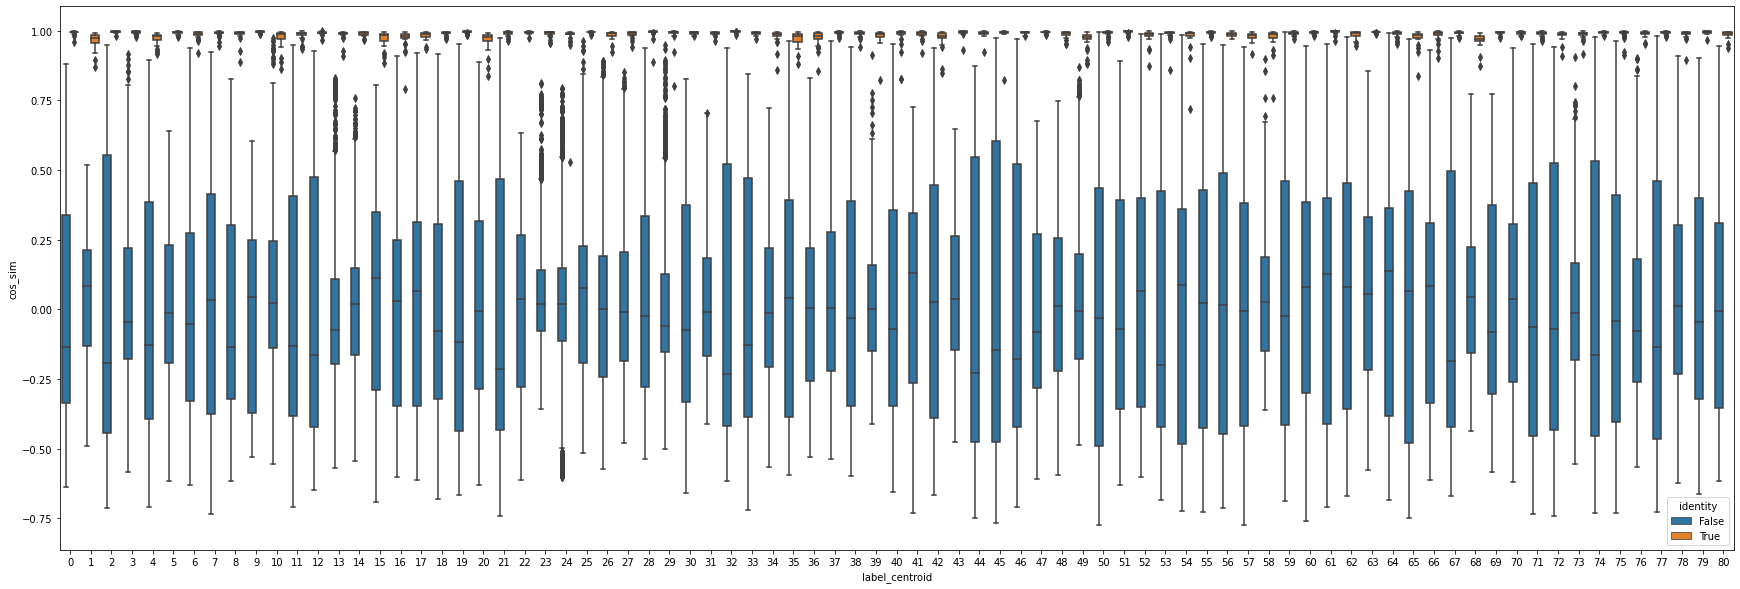

In [233]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=df_cos_sim_centroid, x="label_centroid", y="cos_sim", hue="identity")

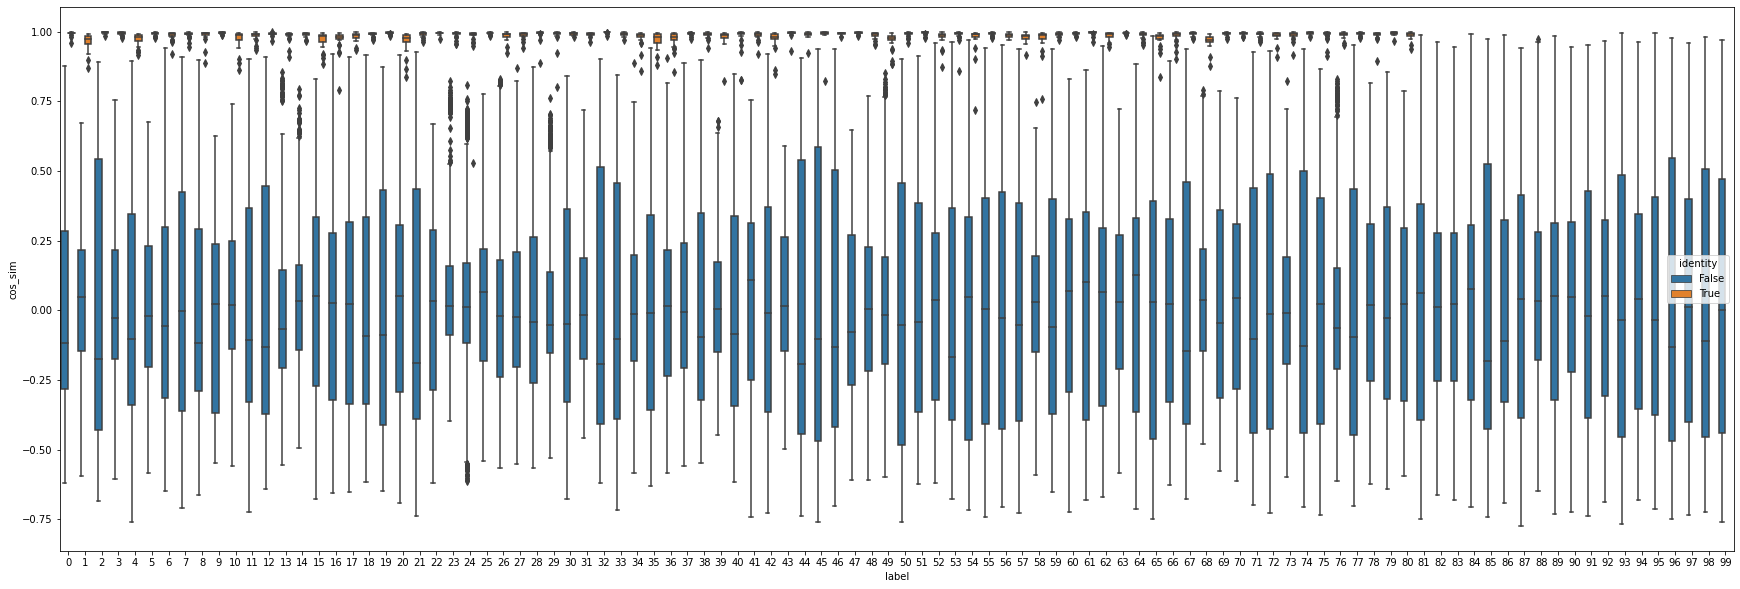

In [234]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=df_cos_sim_centroid, x="label", y="cos_sim", hue="identity")

In [235]:
cos_sim_thres = 0.9

In [236]:
(df_cos_sim_centroid[df_cos_sim_centroid['identity']]['cos_sim'] >= cos_sim_thres).value_counts()

True     2404
False      31
Name: cos_sim, dtype: int64

In [237]:
(df_cos_sim_centroid[~df_cos_sim_centroid['identity']]['cos_sim'] < cos_sim_thres).value_counts()

True     239763
False       802
Name: cos_sim, dtype: int64

In [238]:
# test data
(df_cos_sim_centroid[(df_cos_sim_centroid['label']>80) & (~df_cos_sim_centroid['identity'])]['cos_sim'] < cos_sim_thres).value_counts()

True     45233
False      532
Name: cos_sim, dtype: int64